# Phase 1 - Exploratory analysis
# Biletskyi Oleksii 65% & Barninets Dmytro 35%

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import geopandas as gpd
import folium

In [173]:
product = pd.read_csv("data/product.csv", sep='\t', na_values='?', skip_blank_lines=True)
session = pd.read_csv("data/session.csv", sep='\t', na_values='?', skip_blank_lines=True)
user = pd.read_csv("data/user.csv", sep='\t', na_values='?', skip_blank_lines=True)

Basic Product DataFrame

In [174]:
product

location    product_ean code   store_name
0        America/Chicago  6308407882743   US   Hutchinson
1             Asia/Tokyo  4331962623546   JP     Kamakura
2          Europe/London  4460840744407   GB      Hartley
3          Asia/Shanghai  4075318009546   CN      Yingkou
4       America/New_York  5684895028148   US   Massapequa
...                  ...            ...  ...          ...
14939  Asia/Kuala_Lumpur  1690573891304   MY  Teluk Intan
14940         Asia/Tokyo  2921189921086   JP     Sasayama
14941      Europe/Warsaw  6354194602972   PL        Brzeg
14942       Asia/Kolkata  6744829514365   IN         Adra
14943       Europe/Sofia  8657758529646   BG        Aytos

[14944 rows x 4 columns]

Product attributes types, count and memory usage

In [175]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14944 entries, 0 to 14943
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location     14944 non-null  object
 1   product_ean  14944 non-null  int64 
 2   code         14925 non-null  object
 3   store_name   14944 non-null  object
dtypes: int64(1), object(3)
memory usage: 467.1+ KB


Amount of uniqe data in attributes of Product

In [176]:
product.nunique()

location         184
product_ean    14944
code             133
store_name       958
dtype: int64

Basic Session DataFrame

In [177]:
session

pct_mouse_click  pct_click    product_ean  session_id  \
0             10.57752    5.46845  6683142269036      701347   
1              9.58662    8.06907  9632403910467     1336164   
2              9.47789    7.92570  4830022699502      197570   
3             11.39956    6.48313  6012378144815     1233211   
4              9.94396    8.65422   808433374916     1410112   
...                ...        ...            ...         ...   
11070         11.08250    6.50044  4628347534789      746795   
11071         13.51066    4.52018  4978171808397     1010997   
11072         10.79758   10.90154  3792936929650     1264423   
11073          8.79427    9.55948  1370957534729      350635   
11074         11.42125   12.85063  7960943540588      532705   

       pct_scroll_move_duration  scroll_move_total_rel_distance  pct_scrandom  \
0                       7.15619                         9.73359      22.64234   
1                       9.96110                        11.05089      45.12756   
2                       9.45969                        11.22442      56.12916   
3                       7.44172                         8.74288      23.14856   
4                       9.72734                         8.69972      42.76892   
...                         ...                             ...           ...   
11070                   7.22336                        11.32851      27.63637   
11071                   6.35497                         9.04493      24.55502   
11072                   8.06686                         9.83549      40.32190   
11073                   8.11641                         7.99808      63.49011   
11074                   6.55142                         8.24959      46.77124   

       mouse_move_total_rel_distance  page_activity_duration screen_height  \
0                            6.69014                10.05935           768   
1                            9.47380                 9.11886           600   
2                            9.08196                 9.58957           800   
3                            7.22458                10.59042          1080   
4                            4.23040                 9.35735           800   
...                              ...                     ...           ...   
11070                        5.90661                10.67330          1080   
11071                        9.86588                 9.51134           768   
11072                        8.37836                 9.55577           600   
11073                        6.56825                 9.10113           600   
11074                        9.06371                10.79539          1024   

       ...  total_load_time        session_start  wild_mouse_duration  \
0      ...          5.04607  2022-10-26 23:34:44             10.47393   
1      ...          5.47921  2020-02-03 12:05:35              9.67811   
2      ...          5.82196  2019-06-08 04:55:43             10.40237   
3      ...          1.64424  2022-01-14 07:11:36             13.01746   
4      ...          3.25284  2020-11-12 10:38:58             10.91638   
...    ...              ...                  ...                  ...   
11070  ...          5.64065  2023-08-06 08:02:43              8.91797   
11071  ...         13.80593  2021-09-19 22:27:19             14.29029   
11072  ...         11.53913  2019-11-05 22:04:19              8.32945   
11073  ...          3.37595  2020-05-14 07:27:06             12.05628   
11074  ...          2.64430  2019-04-10 04:03:34              9.82171   

       browser_name  pct_wild_mouse  pct_scroll_move  ack  pct_doubleclick  \
0           firefox        22.25759         34.48123  0.0         11.45183   
1            chrome        27.80762         54.03556  0.0          5.90110   
2           firefox        45.74291         71.01563  0.0          5.44241   
3            mobile        33.46381         61.27034  0.0         11.91876   
4              edge        64.58192         58.27287  0.0    

Session attributes types, count and memory usage

In [178]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11075 entries, 0 to 11074
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 11064 non-null  float64
 1   pct_click                       11064 non-null  float64
 2   product_ean                     11075 non-null  int64  
 3   session_id                      11075 non-null  int64  
 4   pct_scroll_move_duration        11064 non-null  float64
 5   scroll_move_total_rel_distance  11063 non-null  float64
 6   pct_scrandom                    11064 non-null  float64
 7   mouse_move_total_rel_distance   11064 non-null  float64
 8   page_activity_duration          11064 non-null  float64
 9   screen_height                   11075 non-null  object 
 10  pct_mouse_move                  11064 non-null  float64
 11  pct_input                       11064 non-null  float64
 12  pct_rage_click                  

Amount of uniqe data in attributes of Session

In [179]:
session.nunique()

pct_mouse_click                   10814
pct_click                         10855
product_ean                       10944
session_id                        10907
pct_scroll_move_duration          10841
scroll_move_total_rel_distance    10823
pct_scrandom                      10916
mouse_move_total_rel_distance     10852
page_activity_duration            10765
screen_height                         7
pct_mouse_move                    10781
pct_input                          8807
pct_rage_click                    10925
session_duration                  10942
user_id                            2474
total_load_time                   10872
session_start                     10944
wild_mouse_duration               10867
browser_name                          7
pct_wild_mouse                    10919
pct_scroll_move                   10926
ack                                   2
pct_doubleclick                   10854
screen_width                          7
pct_click_product_info            10923


Basic User DataFrame

In [180]:
user

race                                            address  \
0             NaN                        Pyšelská 244\n148 46 Přimda   
1     unspecified                                                NaN   
2             NaN          Incrocio Rita, 89\n61033, Fermignano (PU)   
3             NaN  Via Federigo, 139 Appartamento 0\n80141, Napol...   
4             NaN                                                NaN   
...           ...                                                ...   
2551        white  Jardim Cardoso, 80\nNova Cachoeirinha\n6477234...   
2552          NaN                           USS Guzman\nFPO AA 59874   
2553        asian                              神奈川県横浜市鶴見区箭坪9丁目10番17号   
2554          NaN  Contrada Agostinelli, 25 Appartamento 50\n0007...   
2555          NaN    33725 Evelyn Bypass\nRodriguezborough, TX 92748   

              registration  user_id           username   birthdate  \
0     09/07/2016, 00:00:00     1354      malyalexander  1968-09-14   
1               2020/05/24     1006      okamotosatomi         NaN   
2               2017/02/02     2038  galassointerminei  1927-07-24   
3              27 Apr 2021     1247     ferraramelissa         NaN   
4     04/30/2018, 00:00:00     2555     pedro-miguel02  1909-03-02   
...                    ...      ...                ...         ...   
2551           24 Aug 2020     1961      sophiealmeida  1953-12-07   
2552            2017/02/23     1560            kmiller  1913-09-19   
2553           12 Jul 2018     1973            naoki08  1937-11-07   
2554            2015/12/26     1642     disderoedoardo  1967-08-27   
2555  01/30/2017, 00:00:00     1212   robinsonnicholas  1964-10-19   

                    name                                          residence  \
0     Jaroslava Nováková  Podle Náhonu 5\n656 83 Rychnov u Jablonce nad ...   
1                 山下 美加子                                                NaN   
2         Sandra Musatti                                                NaN   
3           Amedeo Gigli                                                NaN   
4     Sra. Maysa da Cruz                                                NaN   
...                  ...                                                ...   
2551      Emanuel Campos                                                NaN   
2552      Robert Whitney            1733 Reed Forest\nPort Robert, OR 02180   
2553               佐藤 花子                               山口県香取郡多古町六番町6丁目12番5号   
2554   Raimondo Pisaroni                                                NaN   
2555       Kimberly Owen             514 Allen Cove\nWest Michael, KS 25886   

                                     current_location  \
0       (Decimal('-62.6461045'), Decimal('1.714148'))   
1      (Decimal('-88.1847325'), Decimal('42.590504'))   
2       (Decimal('26.444037'), Decimal('-29.968669'))   
3       (Decimal('-14.554010'), Decimal('39.152872'))   
4     (Decimal('-76.0386815'), Decimal('-66.531628'))   
...                                               ...   
2551   (Decimal('65.0348535'), Decimal('179.858643'))   
2552   (Decimal('49.842251'), Decimal('-103.202604'))   
2553     (Decimal('-8.5409535'), Decimal('6.318963'))   
2554   (Decimal('20.6079075'), Decimal('168.782586'))   
2555    (Decimal('46.8372735'), Decimal('62.381079'))   

                           mail  sex  
0             cruzicka@volny.cz  NaN  
1             osamu65@yahoo.com  NaN  
2      sermontimassimo@poste.it  NaN  
3        grossimelissa@tele2.it    M  
4     freitasagatha@hotmail.com  NaN  
...                         ...  ...  
2551       arodrigues@ig.com.br    M  
2552      nunezwesley@yahoo.com    M  
2553        ohasegawa@gmail.com    F  
2554      giuliapennetta@tin.it    M  
2555       brenda77@hotmail.com  NaN  

[2556 rows x 11 columns]

User attributes types, count and memory usage

In [181]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   race              767 non-null    object
 1   address           2173 non-null   object
 2   registration      2556 non-null   object
 3   user_id           2556 non-null   int64 
 4   username          2556 non-null   object
 5   birthdate         1406 non-null   object
 6   name              2556 non-null   object
 7   residence         895 non-null    object
 8   current_location  2428 non-null   object
 9   mail              2556 non-null   object
 10  sex               1278 non-null   object
dtypes: int64(1), object(10)
memory usage: 219.8+ KB


Amount of unique data in attributes of Session

In [182]:
user.nunique()

race                   5
address             2173
registration        2357
user_id             1586
username            2529
birthdate           1378
name                2497
residence            895
current_location    2428
mail                2553
sex                    2
dtype: int64

Here we have barcharts for all numeric values in Session(as the most informative dataset)

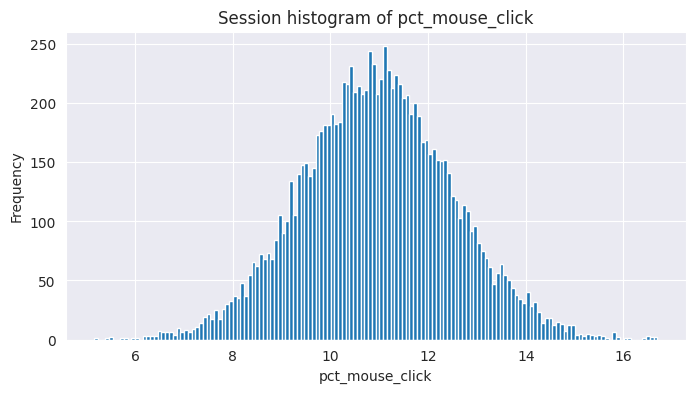

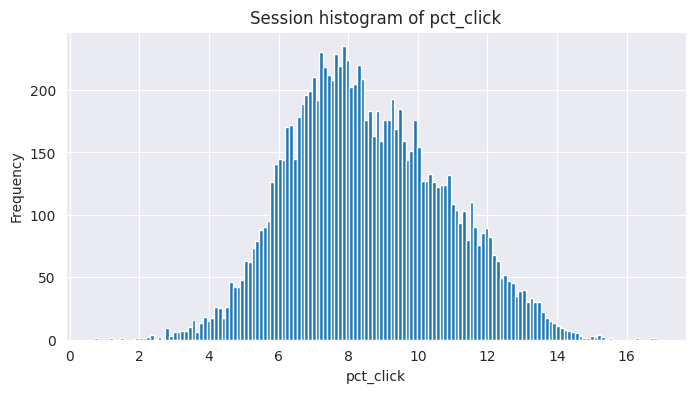

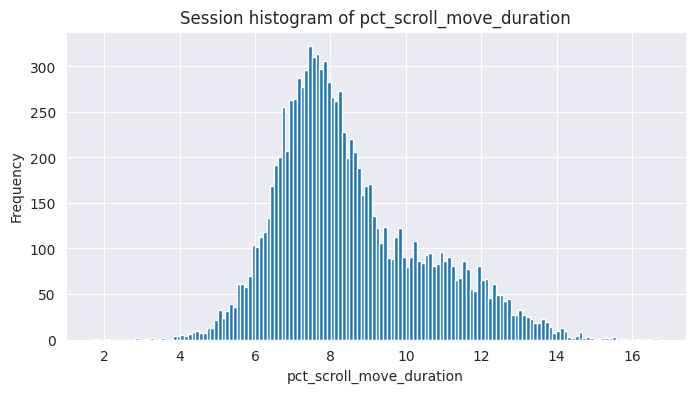

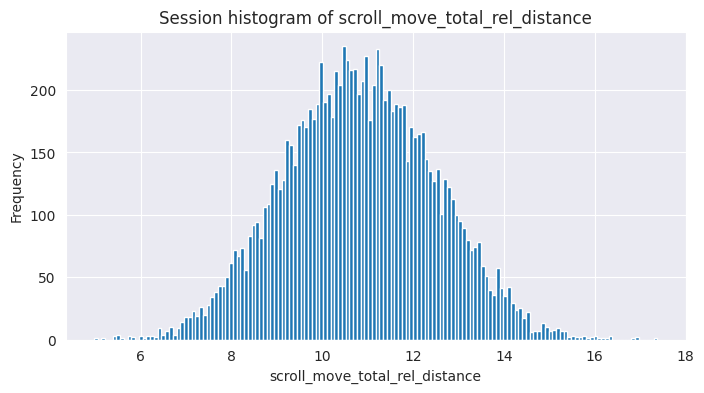

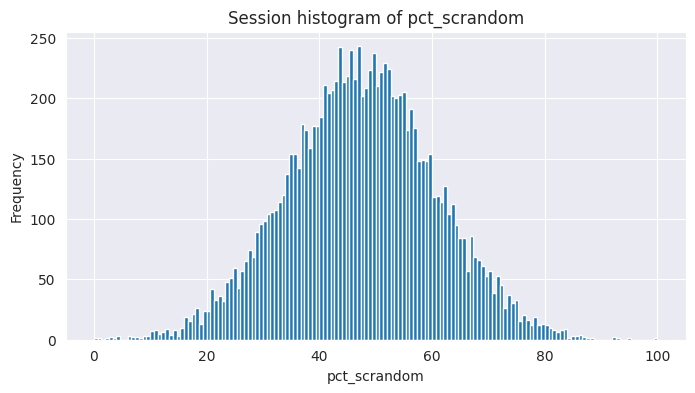

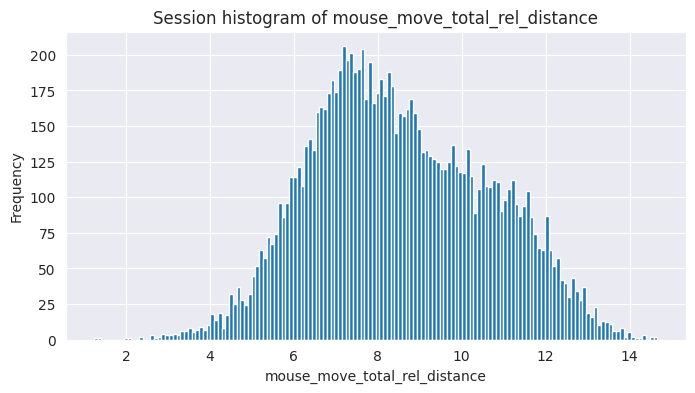

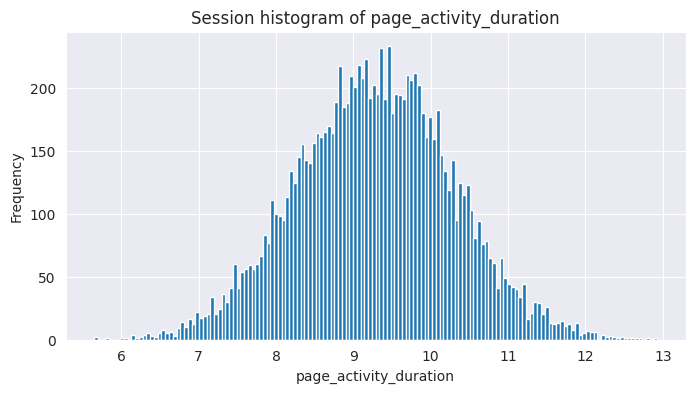

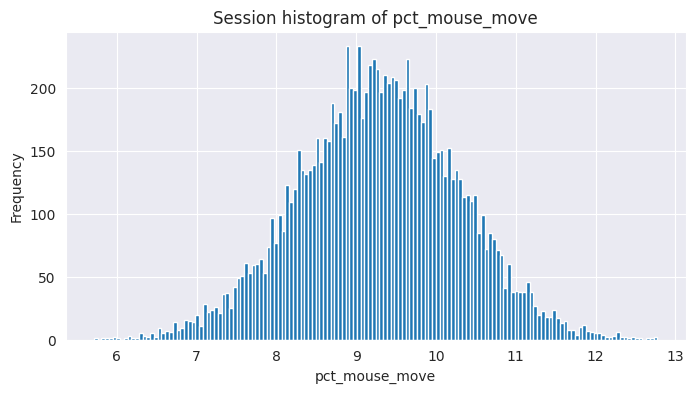

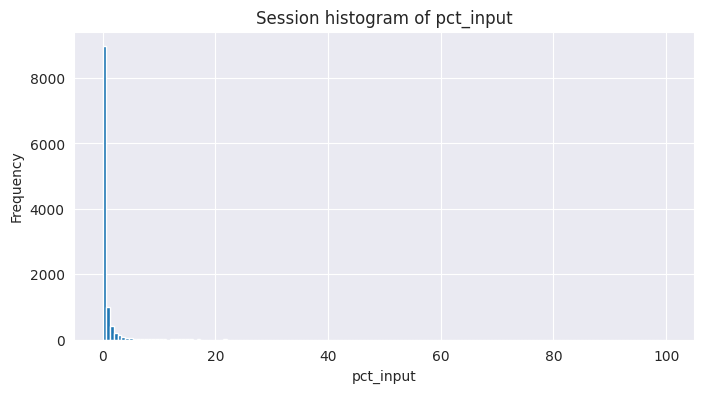

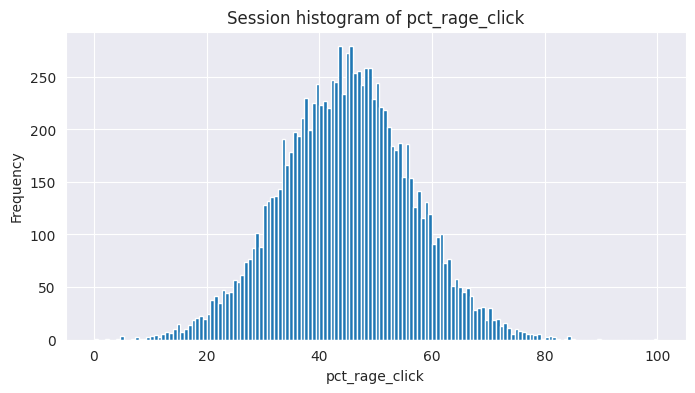

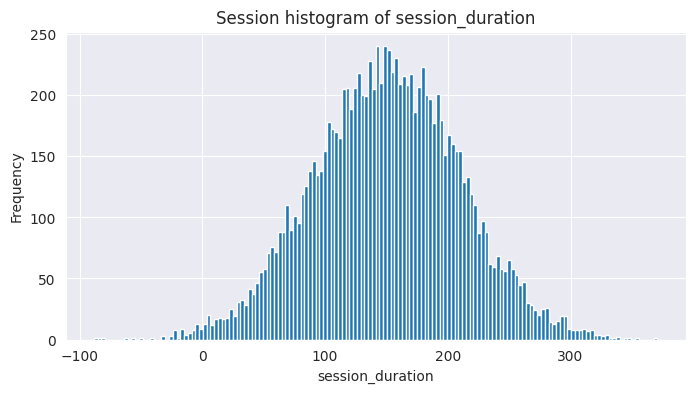

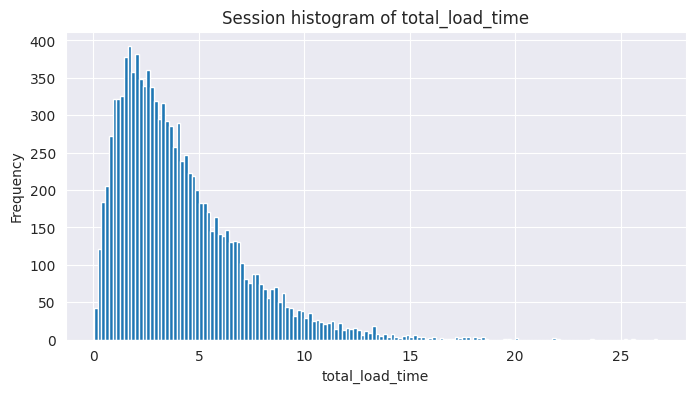

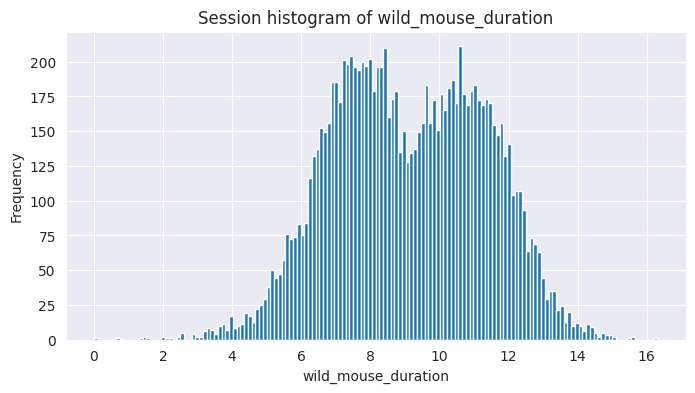

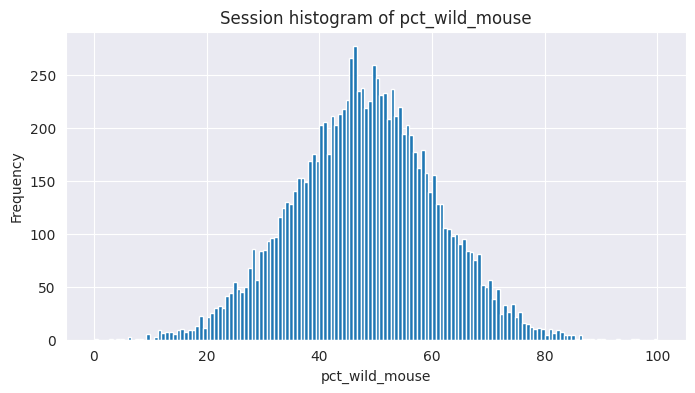

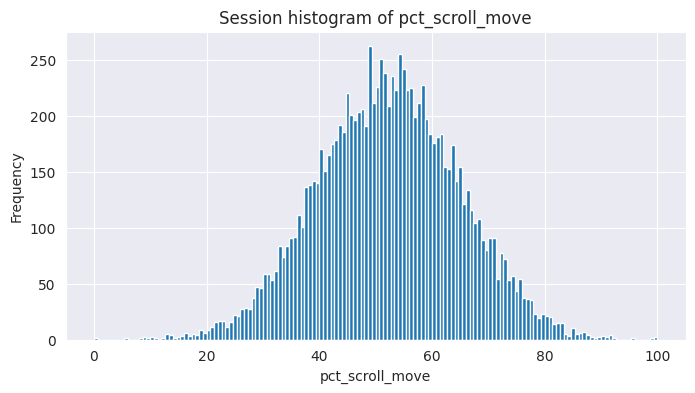

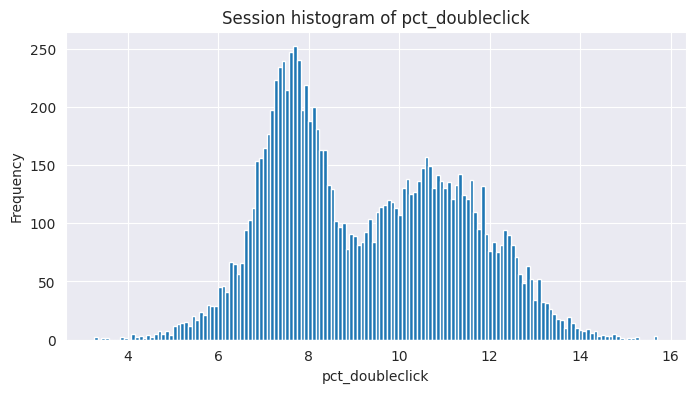

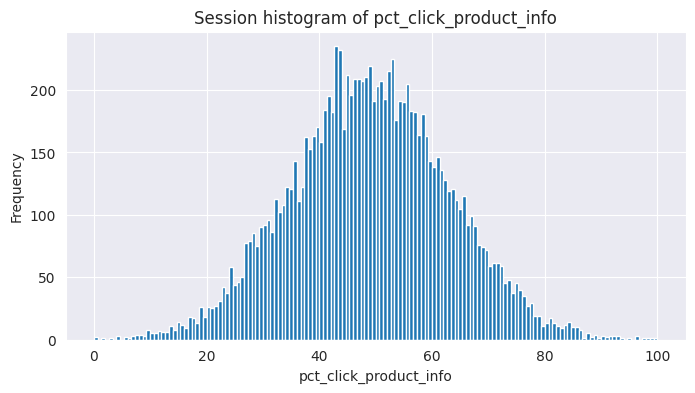

In [183]:
numeric_columns = session.select_dtypes(include=['number'])


for column in numeric_columns.columns:
    if column not in ['session_id', 'ack', 'user_id', 'product_ean']:
        plt.figure(figsize=(8, 4))
        plt.hist(numeric_columns[column], bins=150)
        plt.title(f'Session histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

**Analýza jednotlivých atribútov:**

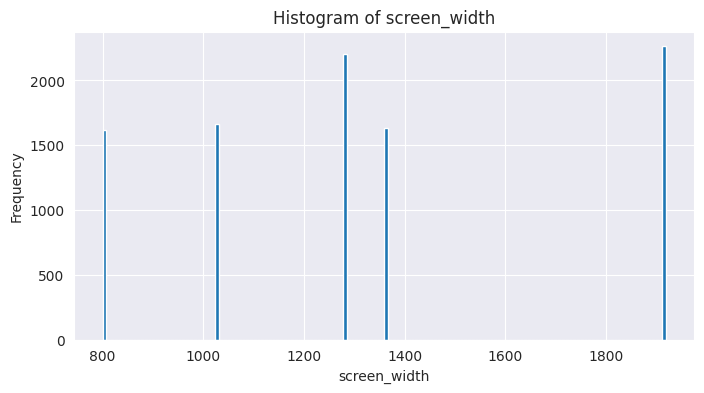

Average screen width: 1321.37994244911
Minimum screen width: 800
Maximum screen width: 1920
Median screen width: 1280.0
Standard deviation of screen width: 386.8992902661893


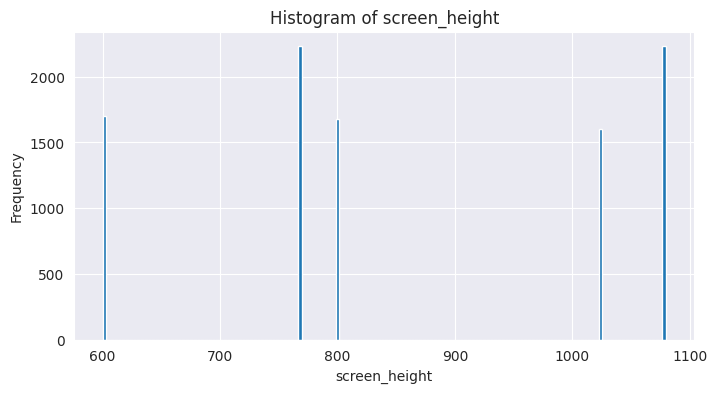

Average screen height: 860.6598156584384
Minimum screen height: 600
Maximum screen height: 1080
Median screen height: 800.0
Standard deviation of screen height: 175.5215045088183


In [184]:
filtered_screen_height = session[(session['screen_height'] != 'lower') & (session['screen_height'] != 'higher')]['screen_height']
screen_height = filtered_screen_height.astype(int)


filtered_screen_width = session[(session['screen_width'] != 'lower') & (session['screen_width'] != 'higher')]['screen_width']
screen_width = filtered_screen_width.astype(int)

plt.figure(figsize=(8, 4))
plt.hist(screen_width, bins=150)
plt.title(f'Histogram of screen_width')
plt.xlabel('screen_width')
plt.ylabel('Frequency')
plt.show()
print(f'Average screen width: {screen_width.mean()}')
print(f'Minimum screen width: {screen_width.min()}')
print(f'Maximum screen width: {screen_width.max()}')
print(f'Median screen width: {screen_width.median()}')
print(f'Standard deviation of screen width: {screen_width.std()}')

plt.figure(figsize=(8, 4))
plt.hist(screen_height, bins=150)
plt.title(f'Histogram of screen_height')
plt.xlabel('screen_height')
plt.ylabel('Frequency')
plt.show()
print(f'Average screen height: {screen_height.mean()}')
print(f'Minimum screen height: {screen_height.min()}')
print(f'Maximum screen height: {screen_height.max()}')
print(f'Median screen height: {screen_height.median()}')
print(f'Standard deviation of screen height: {screen_height.std()}')

Responsive Design: Knowing the variety of screen heights and widths among users, a store can adapt its web design to look and function well on different devices. This improves user experience and customer satisfaction.

Advertising and Marketing Solutions: By knowing which screen sizes are most commonly used, a store can better tailor its advertising campaigns and marketing materials to specific target audiences.

Content Control: Screen height and width can affect how content is displayed, such as the number of products displayed on a page or the placement of important interface elements. This can be an important aspect for creating easy navigation and increasing conversions.

Thus, screen height analysis can help a store better understand its users and better meet their needs, which ultimately helps improve the user experience and increase the efficiency of the online store.

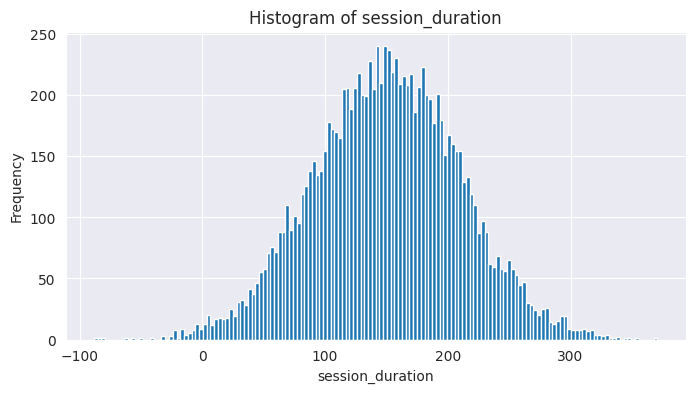

Average session_duration: 150.11
Minimum session_duration: -88.0
Maximum session_duration: 371.0
Median session_duration: 150.4
Standard deviation of session_duration: 59.93


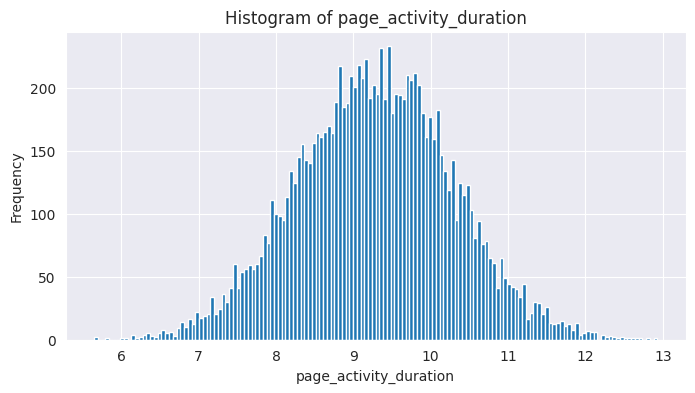

Average page_activity_duration: 9.28
Minimum page_activity_duration: 6.0
Maximum page_activity_duration: 13.0
Median page_activity_duration: 9.3
Standard deviation of page_activity_duration: 1.01


In [185]:
session_duration = session['session_duration']

plt.figure(figsize=(8, 4))
plt.hist(session_duration, bins=150)
plt.title(f'Histogram of session_duration')
plt.xlabel('session_duration')
plt.ylabel('Frequency')
plt.show()

print(f'Average session_duration: {round(session_duration.mean(), 2)}')
print(f'Minimum session_duration: {round(session_duration.min(), 0)}')
print(f'Maximum session_duration: {round(session_duration.max(), 0)}')
print(f'Median session_duration: {round(session_duration.median(), 1)}')
print(f'Standard deviation of session_duration: {round(session_duration.std(), 2)}')

page_activity_duration = session['page_activity_duration']

plt.figure(figsize=(8, 4))
plt.hist(page_activity_duration, bins=150)
plt.title(f'Histogram of page_activity_duration')
plt.xlabel('page_activity_duration')
plt.ylabel('Frequency')
plt.show()

print(f'Average page_activity_duration: {round(page_activity_duration.mean(), 2)}')
print(f'Minimum page_activity_duration: {round(page_activity_duration.min(), 0)}')
print(f'Maximum page_activity_duration: {round(page_activity_duration.max(), 0)}')
print(f'Median page_activity_duration: {round(page_activity_duration.median(), 1)}')
print(f'Standard deviation of page_activity_duration: {round(page_activity_duration.std(), 2)}')

Understanding customer behavior: This data allows you to see how much time users spend on a site, which helps determine their level of engagement.

Improved user experience: By knowing which sections of the site or products attract more attention, the store can optimize content and design to meet customer needs.

Marketing optimization: Information about session duration helps the store plan advertising campaigns and customer retention strategies.

Negative values may be caused by technical errors, out-of-date data, or anomalous user behavior and should be further investigated.

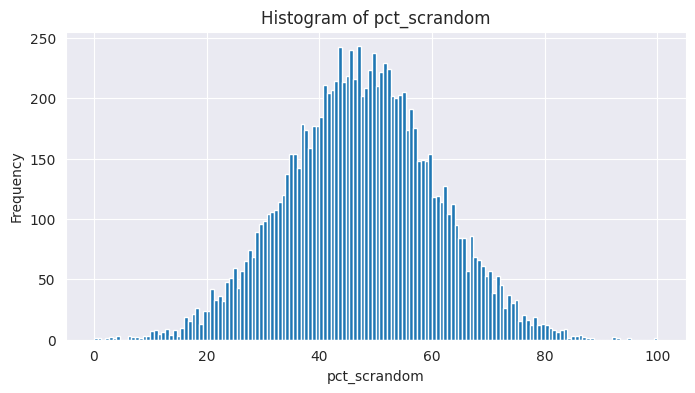

Average pct_scrandom: 47.46
Minimum pct_scrandom: 0.0
Maximum pct_scrandom: 100.0
Median pct_scrandom: 47.4
Standard deviation of pct_scrandom: 13.13


In [186]:
pct_scrandom = session['pct_scrandom']

plt.figure(figsize=(8, 4))
plt.hist(pct_scrandom, bins=150)
plt.title(f'Histogram of pct_scrandom')
plt.xlabel('pct_scrandom')
plt.ylabel('Frequency')
plt.show()

print(f'Average pct_scrandom: {round(pct_scrandom.mean(), 2)}')
print(f'Minimum pct_scrandom: {round(pct_scrandom.min(), 0)}')
print(f'Maximum pct_scrandom: {round(pct_scrandom.max(), 0)}')
print(f'Median pct_scrandom: {round(pct_scrandom.median(), 1)}')
print(f'Standard deviation of pct_scrandom: {round(pct_scrandom.std(), 2)}')

Understanding user behavior: The pct_scrandom metric allows you to evaluate how quickly users scroll through a product page. This helps you understand how quickly users explore offers.

Optimize design and content: Studying this data can help a store improve the design and placement of products on the page to make it more attractive and informative for users.

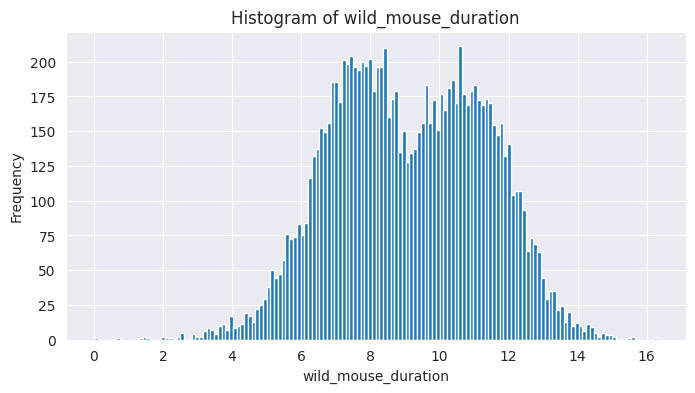

Average wild_mouse_duration: 9.11
Minimum wild_mouse_duration: 0.0
Maximum wild_mouse_duration: 16.0
Median wild_mouse_duration: 9.1
Standard deviation of wild_mouse_duration: 2.2


In [187]:
wild_mouse_duration = session['wild_mouse_duration']

plt.figure(figsize=(8, 4))
plt.hist(wild_mouse_duration, bins=150)
plt.title(f'Histogram of wild_mouse_duration')
plt.xlabel('wild_mouse_duration')
plt.ylabel('Frequency')
plt.show()

print(f'Average wild_mouse_duration: {round(wild_mouse_duration.mean(), 2)}')
print(f'Minimum wild_mouse_duration: {round(wild_mouse_duration.min(), 0)}')
print(f'Maximum wild_mouse_duration: {round(wild_mouse_duration.max(), 0)}')
print(f'Median wild_mouse_duration: {round(wild_mouse_duration.median(), 1)}')
print(f'Standard deviation of wild_mouse_duration: {round(wild_mouse_duration.std(), 2)}')

Average: 9.11. This means that on average, users engage in active and rapid mouse movement for approximately 9.11 units of time.

Minimum value: 0.0. This indicates that there are users who don't have the jerky, fast mouse movement at all, perhaps using the mouse more calmly and smoothly.

Maximum value: 16.0. This shows that among the users there are those who experience very intense and fast mouse movement.

Median: 9.1. The median is close to the mean, indicating that there are no significant outliers in the data.

Standard deviation: 2.2. It is a measure of the spread of data around its mean. The low standard deviation indicates that there is relatively little variation in users' data on jerky and fast mouse movements.

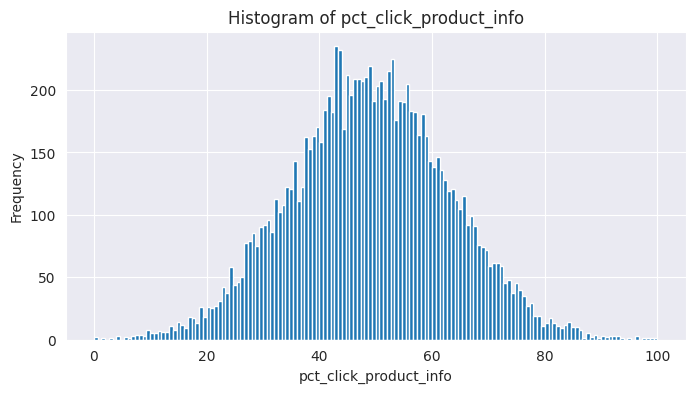

Average pct_click_product_info: 48.97
Minimum pct_click_product_info: 0.0
Maximum pct_click_product_info: 100.0
Median pct_click_product_info: 48.9
Standard deviation of pct_click_product_info: 14.02


In [188]:
pct_click_product_info = session['pct_click_product_info']

plt.figure(figsize=(8, 4))
plt.hist(pct_click_product_info, bins=150)
plt.title(f'Histogram of pct_click_product_info')
plt.xlabel('pct_click_product_info')
plt.ylabel('Frequency')
plt.show()

print(f'Average pct_click_product_info: {round(pct_click_product_info.mean(), 2)}')
print(f'Minimum pct_click_product_info: {round(pct_click_product_info.min(), 0)}')
print(f'Maximum pct_click_product_info: {round(pct_click_product_info.max(), 0)}')
print(f'Median pct_click_product_info: {round(pct_click_product_info.median(), 1)}')
print(f'Standard deviation of pct_click_product_info: {round(pct_click_product_info.std(), 2)}')

Understanding user interests: The pct_click_product_info metric allows the store to understand how often users show interest in additional information about products. This may include descriptions, specifications, reviews and other details about the products. By knowing how many users click to get this information, the store can more accurately match users' needs.

Measuring Content Performance: A store can use click data on product information to determine what content is most engaging to users. This helps the store optimize content and provide more valuable information.

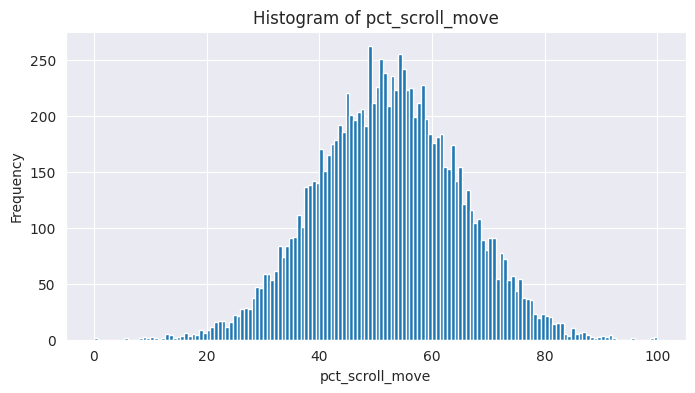

Average pct_scroll_move: 52.25
Minimum pct_scroll_move: 0.0
Maximum pct_scroll_move: 100.0
Median pct_scroll_move: 52.3
Standard deviation of pct_scroll_move: 12.58


In [189]:
pct_scroll_move = session['pct_scroll_move']

plt.figure(figsize=(8, 4))
plt.hist(pct_scroll_move, bins=150)
plt.title(f'Histogram of pct_scroll_move')
plt.xlabel('pct_scroll_move')
plt.ylabel('Frequency')
plt.show()

print(f'Average pct_scroll_move: {round(pct_scroll_move.mean(), 2)}')
print(f'Minimum pct_scroll_move: {round(pct_scroll_move.min(), 0)}')
print(f'Maximum pct_scroll_move: {round(pct_scroll_move.max(), 0)}')
print(f'Median pct_scroll_move: {round(pct_scroll_move.median(), 1)}')
print(f'Standard deviation of pct_scroll_move: {round(pct_scroll_move.std(), 2)}')

Average value: 52.25. This means that on average, users scroll through about half of a page's content, which may indicate that they are active in browsing.

Minimum value: 0.0. This suggests that there are users who do not scroll the page at all, perhaps they are limited to only the visible part of the content.

Maximum value: 100.0. This shows that there are some users who scroll through all the available information on a page.

Median: 52.3. The median is close to the mean, indicating that there are no significant outliers in the data.

Standard deviation: 12.58. It is a measure of the spread of data around its mean. A large standard deviation may indicate significant variability in post scrolling data between users.

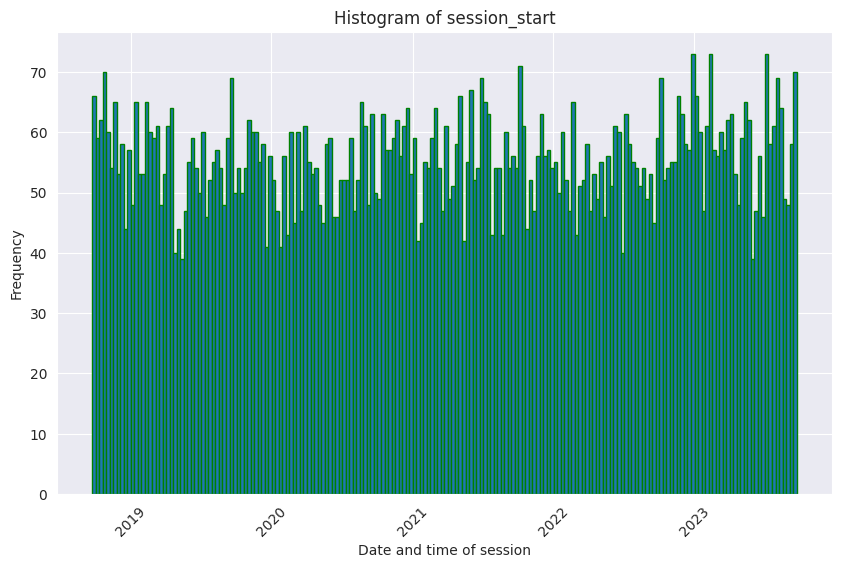

Average session_start: 2021-03-31 17:02:15.707900416
Minimum session_start: 2018-09-23 12:26:44
Maximum session_start: 2023-09-23 09:02:02
Median session_start: 2021-04-04 07:28:33
Standard deviation of session_start: 532 days 05:13:01.700371368


In [190]:
session_start = pd.to_datetime(session['session_start'])

plt.figure(figsize=(10, 6))
plt.hist(session_start, bins=200, edgecolor='g')
plt.title('Histogram of session_start')
plt.xlabel('Date and time of session')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

print(f'Average session_start: {session_start.mean()}')
print(f'Minimum session_start: {session_start.min()}')
print(f'Maximum session_start: {session_start.max()}')
print(f'Median session_start: {session_start.median()}')
print(f'Standard deviation of session_start: {session_start.std()}')

-Average date (Average session_start): This is the average start date and time of sessions. This metric can help a store determine the average time pattern of user activity, which can be useful for optimizing store performance at different times of the day.

-Minimum session_start: This is the earliest start date for the session. This can indicate the start of an online store and help determine how long the store has been in business.

-Maximum session_start: This is the latest session start date. This metric can indicate the relevance of the data and the length of the period over which the data was collected.

-Median date (Median session_start): The median date is the midpoint between the earliest and latest date. This can help determine the central point in time around which user activity is concentrated.

-Standard deviation of session_start: This is a measure of the spread of session start dates relative to the average date. A large standard deviation may indicate a large variation in user activity over time.

In practice, these metrics can be useful for analysis and planning, for example, to determine temporary peaks in user activity and optimize advertising campaigns, promotions and website maintenance. However, the specific usefulness of each metric depends on the goals and context of the online store.

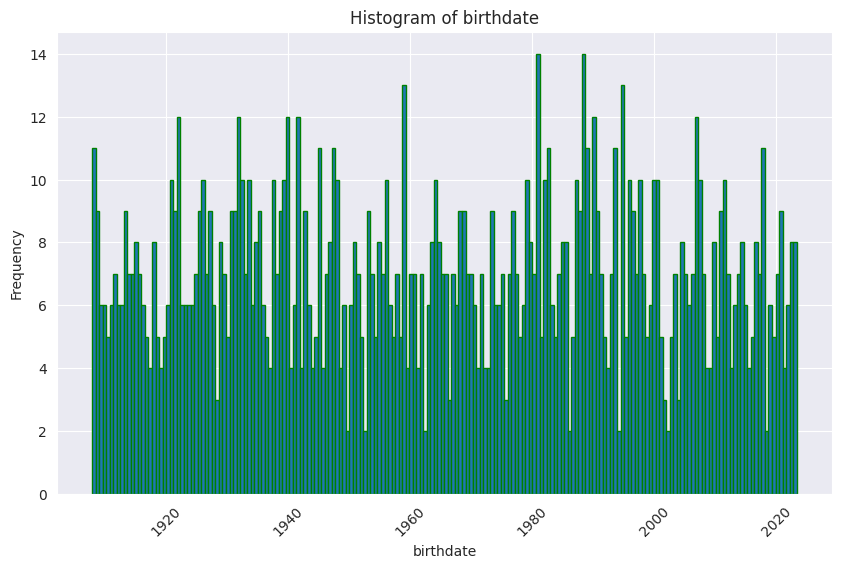

Average birthdate: 1965-03-18 15:50:26.458036992
Minimum birthdate: 1907-10-22 00:00:00
Maximum birthdate: 2023-05-07 00:00:00
Median birthdate: 1965-04-30 00:00:00


In [191]:
birthdate = pd.to_datetime(user['birthdate'])

plt.figure(figsize=(10, 6))
plt.hist(birthdate, bins=200, edgecolor='g')
plt.title('Histogram of birthdate')
plt.xlabel('birthdate')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

print(f'Average birthdate: {birthdate.mean()}')
print(f'Minimum birthdate: {birthdate.min()}')
print(f'Maximum birthdate: {birthdate.max()}')
print(f'Median birthdate: {birthdate.median()}')

For an online store, this data can be useful for customizing product catalogs, offers, marketing campaigns and interfaces taking into account different age groups. For example, a store can create products and offers that better suit certain age groups or adapt site design and content to attract a wide range of users of different ages.

**Paired data analysis:**

Here we can see heatmap of numeric data and notice values, that correlate the most and the least. For example, pkt_mouse_click and scroll_move_total_rel_distance have the biggest correlation or wild_mouse_duration has the least correlation with ack(later about it), among all data. Also, from this heatmap we can notice, that wild_mouse_duration has the biggest amount of high positive correlations(apr. 0.2 to 0.6); session_duration has almost zero correlations with all attributes; ack has the biggest amount of low negative correlations(apr. -0.4 to -0.6)

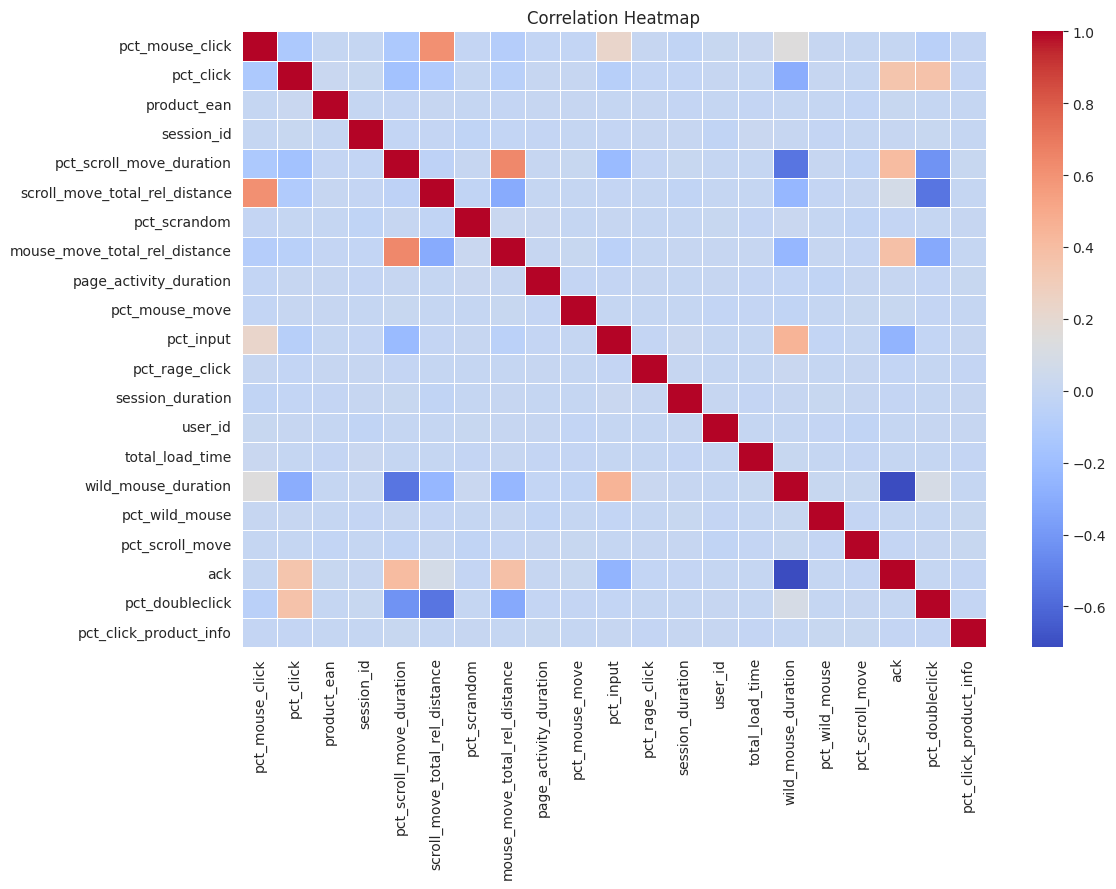

In [192]:
numerical_columns = session.select_dtypes(include=['number'])
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [193]:
corr = session['pct_mouse_click'].corr(session['scroll_move_total_rel_distance'])
print(f'Correlation of pct_mouse_click and scroll_move_total_rel_distance: {round(corr, 2)}\n')

mean1 = session['pct_mouse_click'].mean()
std_dev1 = session['pct_mouse_click'].std()
print(f'Average for pct_mouse_click:{round(mean1, 2)}\nStandard deviation for pct_mouse_click: {round(std_dev1, 2)}\n')

mean2 = session['scroll_move_total_rel_distance'].mean()
std_dev2 = session['scroll_move_total_rel_distance'].std()
print(f'Average for scroll_move_total_rel_distance:{round(mean2, 2)}\nStandard deviation for scroll_move_total_rel_distance: {round(std_dev2, 2)}')

Correlation of pct_mouse_click and scroll_move_total_rel_distance: 0.61

Average for pct_mouse_click:10.95
Standard deviation for pct_mouse_click: 1.54

Average for scroll_move_total_rel_distance:10.81
Standard deviation for scroll_move_total_rel_distance: 1.66


The average value for pct_mouse_click is 10.95, which means that on average approximately 10.95% of user actions involve mouse clicks.
The standard deviation for pct_mouse_click is 1.54. This shows how varied the values are around the mean. In this case, most values are in the range from 10.95 - 1.54 = 9.41 to 10.95 + 1.54 = 12.49.
The average value for scroll_move_total_rel_distance is 10.81, which means that on average the scroll movement is 10.81.
The standard deviation for scroll_move_total_rel_distance is 1.66. This shows the spread of values around the mean. Most values are in the range of 10.81 - 1.66 = 9.15 to 10.81 + 1.66 = 12.47. Given this information, it can be concluded that you have two attributes that are related to each other with a moderate positive correlation. Both attributes have similar means and standard deviations, indicating their similarity.

In [194]:
corr = session['pct_click'].corr(session['pct_mouse_move'])
print(f'Correlation of pct_click and pct_mouse_move: {round(corr, 2)}\n')

mean1 = session['pct_click'].mean()
std_dev1 = session['pct_click'].std()
print(f'Average for pct_click:{round(mean1, 2)}\nStandard deviation for pct_click: {round(std_dev1, 2)}\n')

mean2 = session['pct_mouse_move'].mean()
std_dev2 = session['pct_mouse_move'].std()
print(f'Average for pct_mouse_move:{round(mean2, 2)}\nStandard deviation for pct_mouse_move: {round(std_dev2, 2)}')

Correlation of pct_click and pct_mouse_move: 0.0

Average for pct_click:8.55
Standard deviation for pct_click: 2.2

Average for pct_mouse_move:9.28
Standard deviation for pct_mouse_move: 1.0


The average value of "pct_click" is 8.55, which means that the average click rate is 8.55%.The standard deviation of "pct_click" is 2.2, indicating a spread of values around the mean. The larger the standard deviation, the greater the variability of the data.The average value of "pct_mouse_move" is 9.28, which means that the average percentage of mouse movements is 9.28%.The standard deviation of "pct_mouse_move" is 1.0, indicating a narrower spread of values around the mean.Note that although there is no linear correlation between these two attributes, they may still contain information that may be of interest when analyzing the data. Other types of dependencies or influences between these attributes can be examined, for example, using nonlinear models or other statistical analysis techniques.

In [195]:
corr = session['pct_scroll_move_duration'].corr(session['wild_mouse_duration'])
print(f'Correlation of pct_scroll_move_duration and wild_mouse_duration: {round(corr, 2)}\n')

mean1 = session['pct_scroll_move_duration'].mean()
std_dev1 = session['pct_scroll_move_duration'].std()
print(f'Average for pct_scroll_move_duration:{round(mean1, 2)}\nStandard deviation for pct_scroll_move_duration: {round(std_dev1, 2)}\n')

mean2 = session['wild_mouse_duration'].mean()
std_dev2 = session['wild_mouse_duration'].std()
print(f'Average for wild_mouse_duration:{round(mean2, 2)}\nStandard deviation for wild_mouse_duration: {round(std_dev2, 2)}')

Correlation of pct_scroll_move_duration and wild_mouse_duration: -0.55

Average for pct_scroll_move_duration:8.51
Standard deviation for pct_scroll_move_duration: 1.96

Average for wild_mouse_duration:9.11
Standard deviation for wild_mouse_duration: 2.2


The average value of pct_scroll_move_duration is 8.51, which means that on average users spend about 8.51% of their time scrolling a page.The standard deviation for pct_scroll_move_duration is 1.96, which shows the spread of the data around the mean.The average wild_mouse_duration value is 9.11, which means that on average users spend about 9.11 units of time in this metric (e.g. seconds).The standard deviation for wild_mouse_duration is 2.2, which also indicates that the data is scattered around the mean. An inverse correlation between these two attributes could mean that, for example, as the percentage of time spent scrolling (pct_scroll_move_duration) increases, the time spent moving the mouse wildly (wild_mouse_duration) decreases. Conversely, as time in wild mouse movements increases, the percentage of time spent scrolling decreases.

**Paired data analysis:**

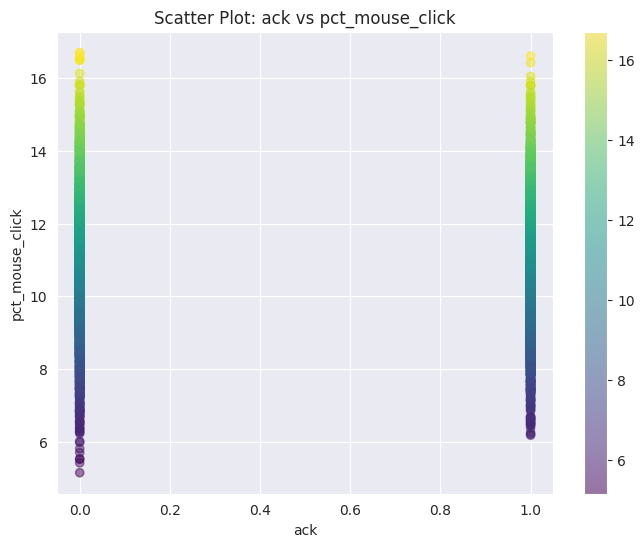

Correlation of ack and pct_mouse_click: -0.0


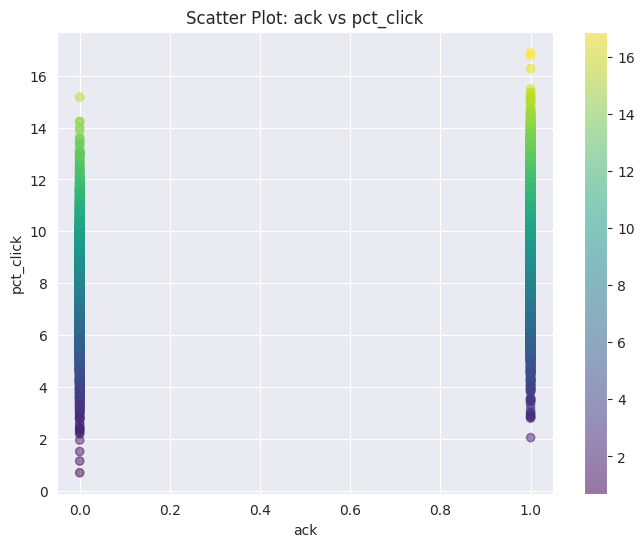

Correlation of ack and pct_click: 0.35


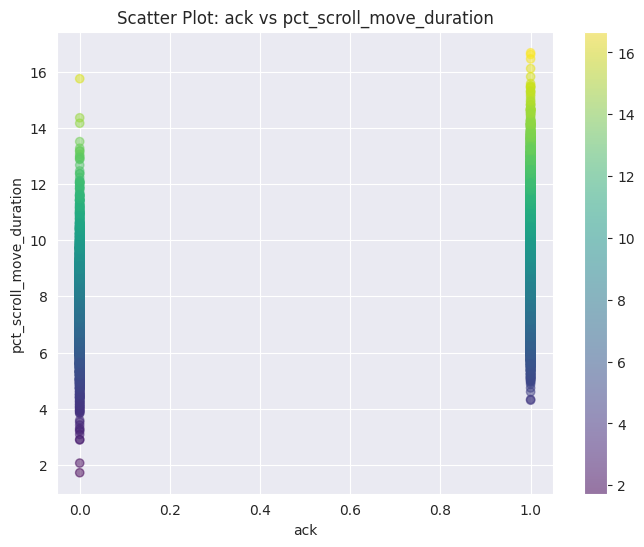

Correlation of ack and pct_scroll_move_duration: 0.41


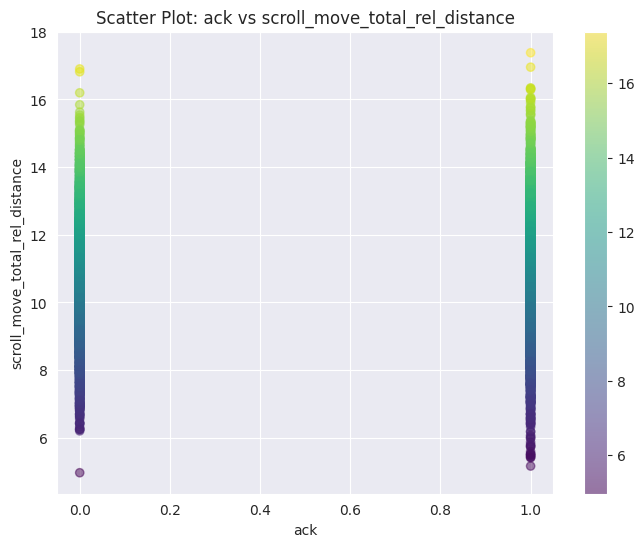

Correlation of ack and scroll_move_total_rel_distance: 0.08


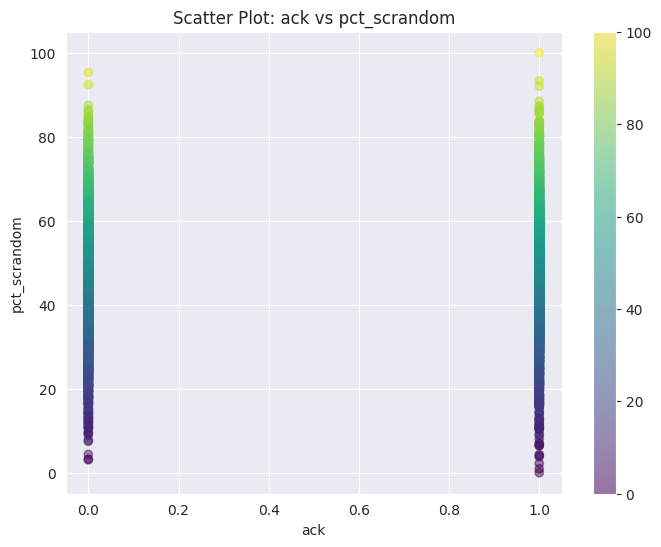

Correlation of ack and pct_scrandom: -0.01


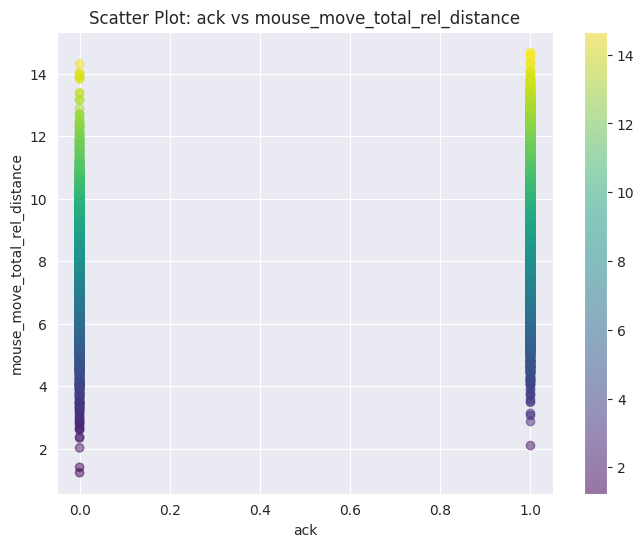

Correlation of ack and mouse_move_total_rel_distance: 0.38


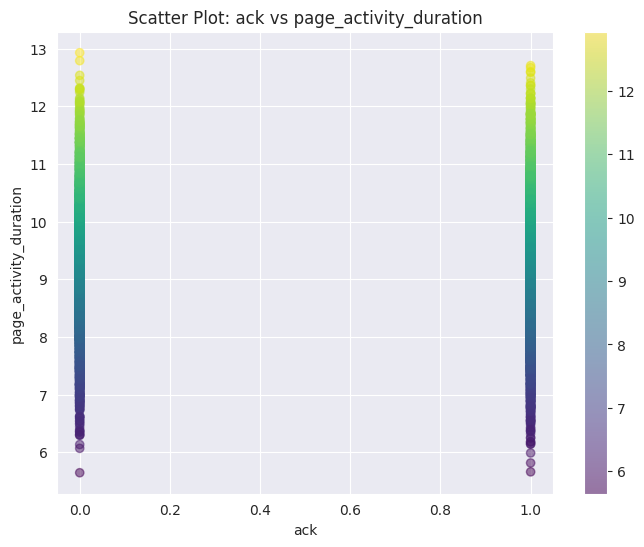

Correlation of ack and page_activity_duration: 0.01


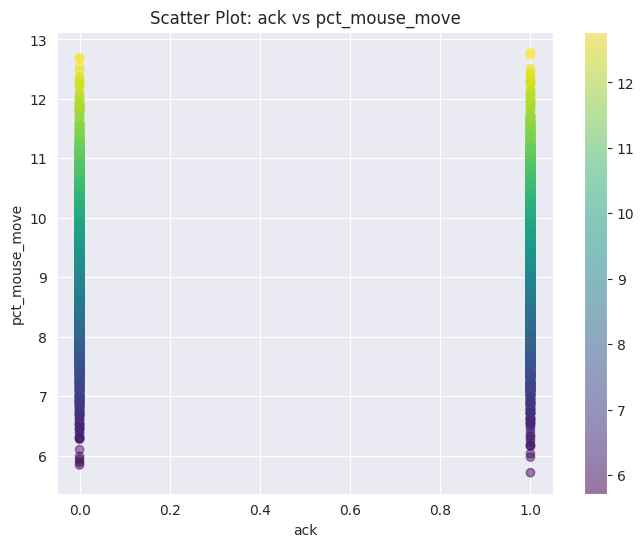

Correlation of ack and pct_mouse_move: 0.02


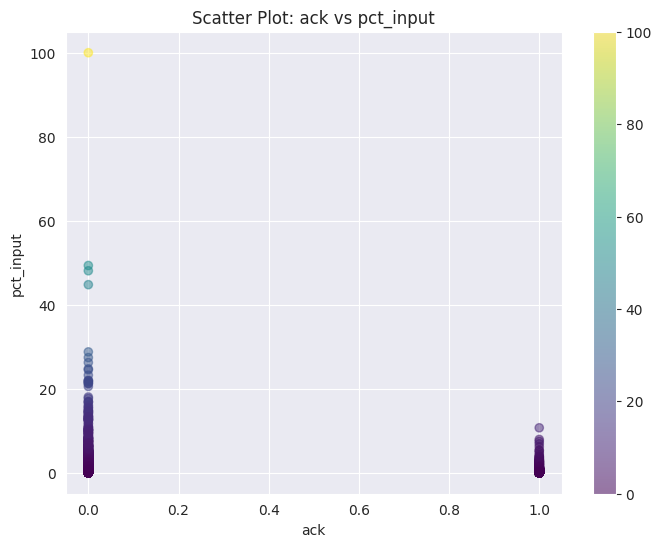

Correlation of ack and pct_input: -0.26


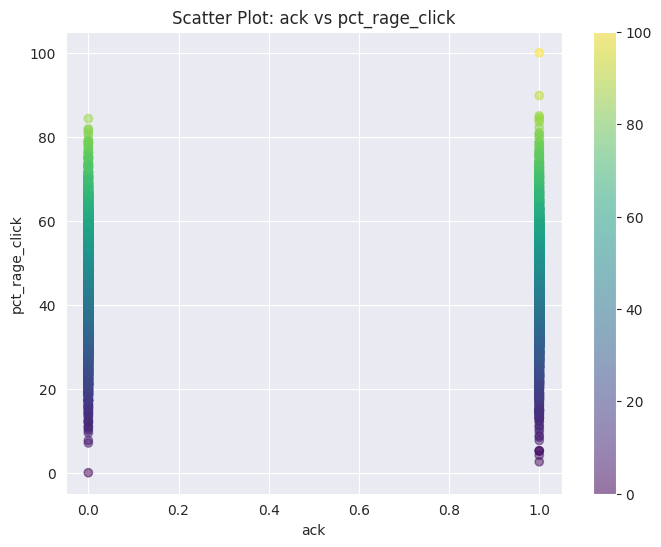

Correlation of ack and pct_rage_click: -0.01


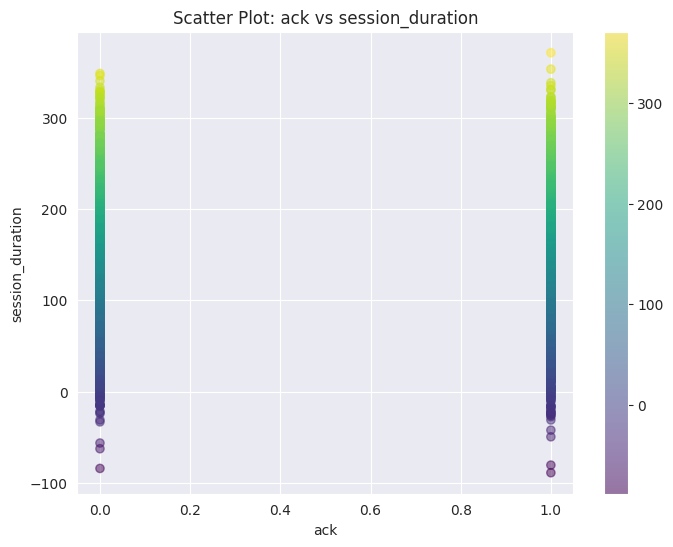

Correlation of ack and session_duration: -0.01


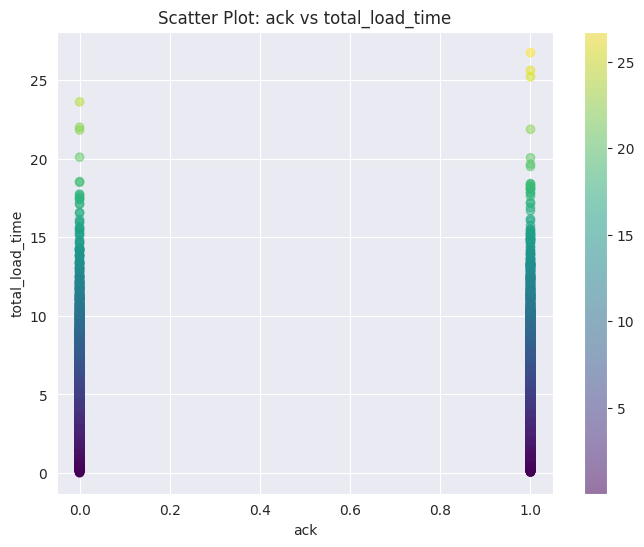

Correlation of ack and total_load_time: -0.0


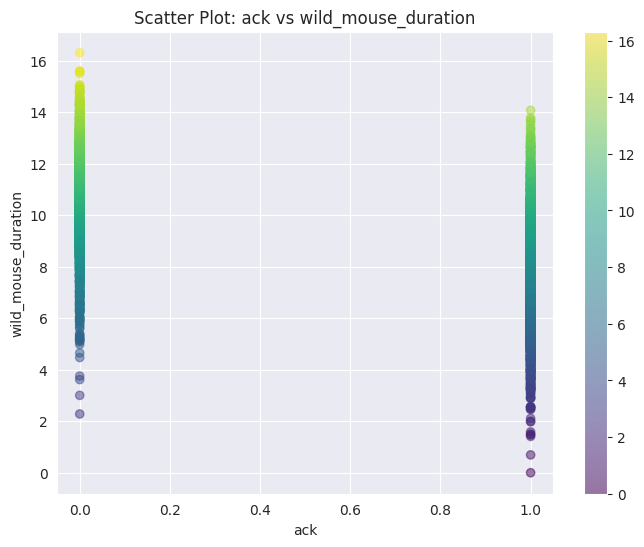

Correlation of ack and wild_mouse_duration: -0.71


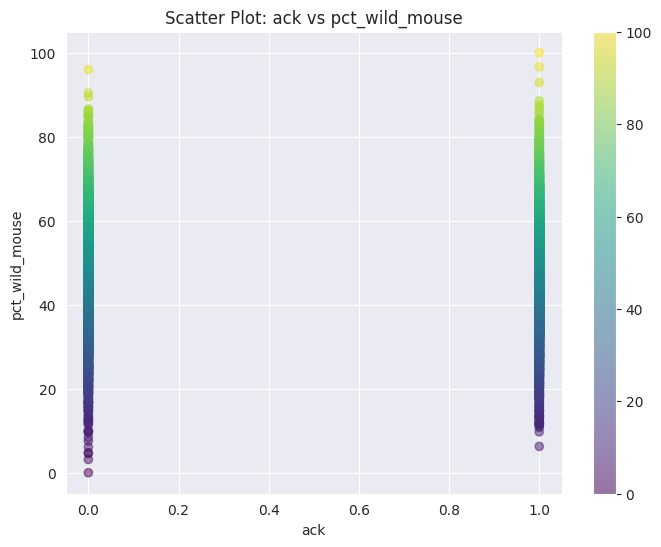

Correlation of ack and pct_wild_mouse: -0.0


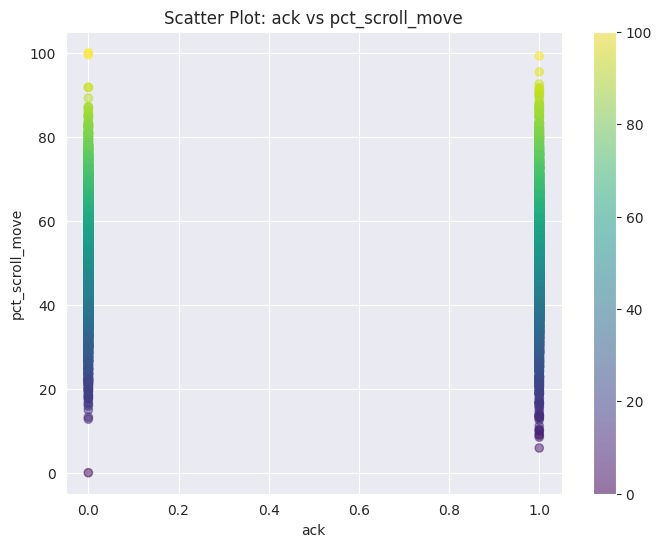

Correlation of ack and pct_scroll_move: -0.01


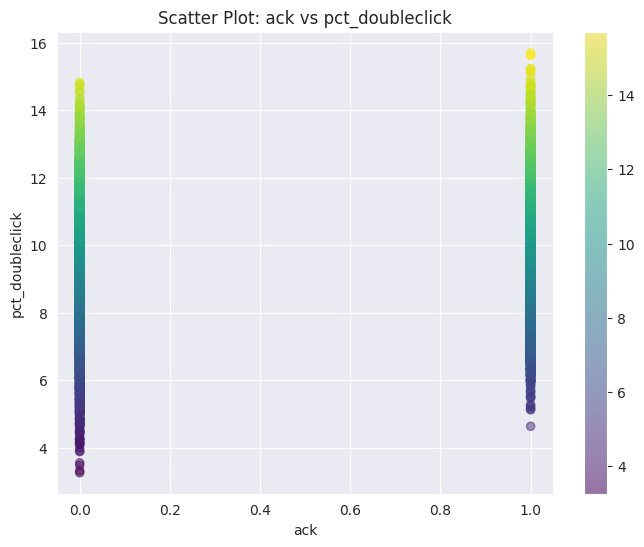

Correlation of ack and pct_doubleclick: -0.0


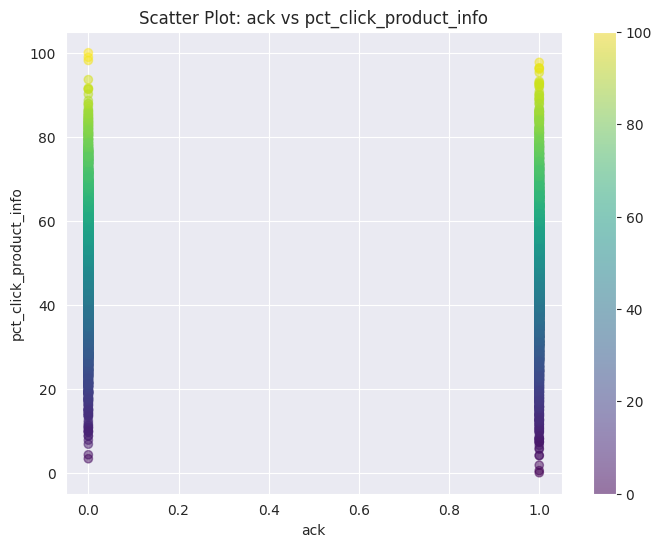

Correlation of ack and pct_click_product_info: -0.01


In [196]:
numeric_columns = session.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop(columns=['ack'])

for column in numeric_columns:
    if column not in ['session_id', 'ack', 'user_id', 'product_ean']:
        color = session[column]
    
        plt.figure(figsize=(8, 6))
        plt.scatter(session['ack'], session[column], alpha=0.5, c=color, cmap='viridis')
        plt.title(f'Scatter Plot: ack vs {column}')
        plt.xlabel('ack')
        plt.ylabel(column)
        plt.grid(True)
        plt.colorbar()
        plt.show()
    
        corr = session['ack'].corr(session[column])
        print(f'Correlation of ack and {column}: {round(corr, 2)}\n')

First set of correlations:

The highest positive correlation is with pct_scroll_move_duration (0.41). This means that the longer users scroll, the more likely they are to receive an ack. This may indicate that users' interest in content increases the likelihood of completing a purchase.
Next comes the correlation with mouse_move_total_rel_distance (0.38). It is also positive and suggests that users who actively move the mouse are more likely to complete purchases.
The highest next correlation is pct_input (-0.26). It is negative, which may mean that reducing the amount of information entered (for example, data entry at checkout) can increase the likelihood of completing a purchase.
The correlation between ack and wild_mouse_duration has a very strong negative relationship (-0.71). This may indicate that prolonged and erratic mouse activity may reduce the likelihood of completing a purchase.

Second set of correlations:

The remaining correlations are close to zero (from -0.01 to 0.02). This means that attributes such as pct_scrandom, pct_rage_click, session_duration, total_load_time, pct_wild_mouse, pct_scroll_move, pct_doubleclick and pct_click_product_info have a weak relationship with the predicted variable ack and probably do not have a significant impact on the likelihood of completing a purchase in an online store.


In the analysis of correlations with the ack variable, which predicts the completion of purchases in an online store, several important dependencies can be identified. The strongest positive correlations are with page scroll duration (pct_scroll_move_duration) and mouse movement activity (mouse_move_total_rel_distance), indicating that users who are more active in this regard are more likely to complete purchases. On the other hand, a negative correlation with the input measure (pct_input) indicates that reducing input information may increase the likelihood of completing purchases. Additionally, the strongly negative association with duration of wild mouse activity (wild_mouse_duration) suggests that such activity may negatively impact purchase completion. The remaining attributes show weak correlations close to zero with ack, which may mean that they have a limited impact on the likelihood of completing purchases.

Based on these correlations, page scroll duration, mouse movement activity, and amount of input may be important factors in predicting purchase completion, and erratic mouse activity may negatively impact purchase completion.

Paring attributes from different files, such as "mouse_click" and "page_activity_duration" from the session.csv file with "address," "user_id," "location," and "store_name" from other files, has its own challenges. This can cause data inconsistency due to different levels of aggregation, possible missing data, column name conflicts, and different data sizes. Data merging may also raise data security and privacy concerns. Instead, it is often more effective to analyze data in the context of its source files and create aggregated reports that take into account information from different sources. This helps simplify analysis and provides more reliable data management.

# User

**Format**

Let's start with registration formatting

In [197]:
def convert_to_standard_date(date_string):
    date_formats = ["%d/%m/%Y, %H:%M:%S", "%Y/%m/%d", "%d %b %Y", "%Y-%m-%d", "%Y-%m-%d %H:%M:%S", "%m/%d/%Y, %H:%M:%S"]
    for date_format in date_formats:
        try:
            date_obj = datetime.strptime(date_string, date_format)
            return date_obj
        except ValueError:
            pass

    raise ValueError("Date format not recognized: " + date_string)
dates = []
for date in user['registration']:
    if date is np.nan:
        dates.append(np.nan)
    dates.append(convert_to_standard_date(str(date)))
user['registration'] = dates
user.sort_values(by='registration')

race                                            address  \
1043        white                    岐阜県西多摩郡奥多摩町轟36丁目4番6号 南赤田クレスト887   
445         white                                                NaN   
602         asian  4934 Raymond Walks Suite 941\nGreenfort, PA 36850   
1854  unspecified   68468 Hannah Drive Apt. 662\nLopezport, NY 09163   
1545          NaN                          Boční I 3\n501 48 Potštát   
...           ...                                                ...   
1722          NaN  7875 Andrea Track Apt. 756\nSamuelburgh, GU 91508   
1421          NaN                    V Hájkách 7\n231 30 Horní Bříza   
1389  unspecified    68780 Miles Parks Suite 027\nGinastad, KY 94338   
12            NaN                              兵庫県横浜市瀬谷区台東26丁目13番16号   
2158          NaN                                                NaN   

     registration  user_id           username   birthdate              name  \
1043   2013-01-10     1313           ahayashi  1924-01-03             村上 結衣   
445    2013-02-11     1992  annaliesesegebahn  2020-12-08    Alina Schuster   
602    2013-03-10     1975       barrettbrent         NaN       Lisa Barker   
1854   2013-04-10      438            omolina  1964-07-13    Raymond Farmer   
1545   2013-04-11     1617           rpokorny  1957-10-06   Alena Dvořáková   
...           ...      ...                ...         ...               ...   
1722   2023-11-02     2522         bakerapril         NaN       Julie Smith   
1421   2023-11-09       50      fialovavlasta  2020-10-07  Štěpánka Fialová   
1389   2023-12-04      295               qlee  1929-01-24       Nancy Price   
12     2023-12-05     1756       nishimurayui         NaN              青木 晃   
2158   2023-12-06     1067             pdusek  1936-12-03   Zbyněk Pospíšil   

                                              residence  \
1043                                                NaN   
445                                                 NaN   
602                                                 NaN   
1854  21736 Dale Land Suite 360\nNorth Virginia, VI ...   
1545                                                NaN   
...                                                 ...   
1722                                                NaN   
1421                                                NaN   
1389      365 Daniel Rapid Apt. 453\nTateberg, MI 85109   
12                                                  NaN   
2158         Červenkova 771\n771 89 Lomnice nad Lužnicí   

                                     current_location  \
1043  (Decimal('69.0487675'), Decimal('-146.401758'))   
445     (Decimal('4.4570825'), Decimal('-32.041118'))   
602   (Decimal('-39.802961'), Decimal('-134.680361'))   
1854   (Decimal('-83.3713445'), Decimal('18.922819'))   
1545   (Decimal('-34.659051'), Decimal('169.591289'))   
...                                               ...   
1722   (Decimal('-61.104755'), Decimal('153.903615'))   
1421   (Decimal('-77.412488'), Decimal('128.182585'))   
1389    (Decimal('18.583578'), Decimal('-99.439053'))   
12     (Decimal('53.242119'), Decimal('-110.177086'))   
2158   (Decimal('-46.722880'), Decimal('175.957657'))   

                              mail  sex  
1043       hiroshikato@hotmail.com  NaN  
445               jrosemann@aol.de  NaN  
602               wsingh@yahoo.com    F  
1854          rodney89@hotmail.com    M  
1545         veselyradek@seznam.cz  NaN  
...                            ...  ...  
1722           ruben62@hotmail.com  NaN  
1421        rihovablanka@seznam.cz  NaN  
1389            alicia18@gmail.com    F  
12               bsuzuki@gmail.com  NaN  
2158  sedlackovakristina@gmail.com    M  

[2556 rows x 11 columns]

We should convert birthdate to age

In [198]:
user['birthdate'] = pd.to_datetime(user['birthdate'])
current_date = datetime.now()
user['age'] = current_date.year - user['birthdate'].dt.year
user = user.drop(columns=['birthdate'])
user

race                                            address  \
0             NaN                        Pyšelská 244\n148 46 Přimda   
1     unspecified                                                NaN   
2             NaN          Incrocio Rita, 89\n61033, Fermignano (PU)   
3             NaN  Via Federigo, 139 Appartamento 0\n80141, Napol...   
4             NaN                                                NaN   
...           ...                                                ...   
2551        white  Jardim Cardoso, 80\nNova Cachoeirinha\n6477234...   
2552          NaN                           USS Guzman\nFPO AA 59874   
2553        asian                              神奈川県横浜市鶴見区箭坪9丁目10番17号   
2554          NaN  Contrada Agostinelli, 25 Appartamento 50\n0007...   
2555          NaN    33725 Evelyn Bypass\nRodriguezborough, TX 92748   

     registration  user_id           username                name  \
0      2016-07-09     1354      malyalexander  Jaroslava Nováková   
1      2020-05-24     1006      okamotosatomi              山下 美加子   
2      2017-02-02     2038  galassointerminei      Sandra Musatti   
3      2021-04-27     1247     ferraramelissa        Amedeo Gigli   
4      2018-04-30     2555     pedro-miguel02  Sra. Maysa da Cruz   
...           ...      ...                ...                 ...   
2551   2020-08-24     1961      sophiealmeida      Emanuel Campos   
2552   2017-02-23     1560            kmiller      Robert Whitney   
2553   2018-07-12     1973            naoki08               佐藤 花子   
2554   2015-12-26     1642     disderoedoardo   Raimondo Pisaroni   
2555   2017-01-30     1212   robinsonnicholas       Kimberly Owen   

                                              residence  \
0     Podle Náhonu 5\n656 83 Rychnov u Jablonce nad ...   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
2551                                                NaN   
2552            1733 Reed Forest\nPort Robert, OR 02180   
2553                               山口県香取郡多古町六番町6丁目12番5号   
2554                                                NaN   
2555             514 Allen Cove\nWest Michael, KS 25886   

                                     current_location  \
0       (Decimal('-62.6461045'), Decimal('1.714148'))   
1      (Decimal('-88.1847325'), Decimal('42.590504'))   
2       (Decimal('26.444037'), Decimal('-29.968669'))   
3       (Decimal('-14.554010'), Decimal('39.152872'))   
4     (Decimal('-76.0386815'), Decimal('-66.531628'))   
...                                               ...   
2551   (Decimal('65.0348535'), Decimal('179.858643'))   
2552   (Decimal('49.842251'), Decimal('-103.202604'))   
2553     (Decimal('-8.5409535'), Decimal('6.318963'))   
2554   (Decimal('20.6079075'), Decimal('168.782586'))   
2555    (Decimal('46.8372735'), Decimal('62.381079'))   

                           mail  sex    age  
0             cruzicka@volny.cz  NaN   55.0  
1             osamu65@yahoo.com  NaN    NaN  
2      sermontimassimo@poste.it  NaN   96.0  
3        grossimelissa@tele2.it    M    NaN  
4     freitasagatha@hotmail.com  NaN  114.0  
...                         ...  ...    ...  
2551       arodrigues@ig.com.br    M   70.0  
2552      nunezwesley@yahoo.com    M  110.0  
2553        ohasegawa@gmail.com    F   86.0  
2554      giuliapennetta@tin.it    M   56.0  
2555       brenda77@hotmail.com  NaN   59.0  

[2556 rows x 11 columns]

Now we are going to convert current location to separated longitude and latitude.
At first, we will check whether all the data is in the same format:

In [199]:
desired_format = r"\(Decimal\('[-\d.]*'\), Decimal\('[-\d.]*'\)\)"

def check_format(value):
    return bool(re.match(desired_format, str(value)))

is_in_desired_format = user['current_location'].apply(check_format)
invalid_values = user[~is_in_desired_format]['current_location']
for value in invalid_values:
    if value is not np.nan:
        print(value)

There is no printed values therefore there is no other formats. Move on to convert this format into separated coordinates

In [200]:
longitude_values = []
latitude_values = []
for current_location in user['current_location']:
    if current_location is np.nan:
        longitude_values.append(np.nan)
        latitude_values.append(np.nan)
    else:
        latitude_str, longitude_str = current_location.split(', ')
        latitude = float(latitude_str.split("('")[1].split("')")[0])
        longitude = float(longitude_str.split("('")[1].split("')")[0])
        longitude_values.append(longitude)
        latitude_values.append(latitude)

user['longitude'] = longitude_values
user['latitude'] = latitude_values
user = user.drop(columns=['current_location'])
user

race                                            address  \
0             NaN                        Pyšelská 244\n148 46 Přimda   
1     unspecified                                                NaN   
2             NaN          Incrocio Rita, 89\n61033, Fermignano (PU)   
3             NaN  Via Federigo, 139 Appartamento 0\n80141, Napol...   
4             NaN                                                NaN   
...           ...                                                ...   
2551        white  Jardim Cardoso, 80\nNova Cachoeirinha\n6477234...   
2552          NaN                           USS Guzman\nFPO AA 59874   
2553        asian                              神奈川県横浜市鶴見区箭坪9丁目10番17号   
2554          NaN  Contrada Agostinelli, 25 Appartamento 50\n0007...   
2555          NaN    33725 Evelyn Bypass\nRodriguezborough, TX 92748   

     registration  user_id           username                name  \
0      2016-07-09     1354      malyalexander  Jaroslava Nováková   
1      2020-05-24     1006      okamotosatomi              山下 美加子   
2      2017-02-02     2038  galassointerminei      Sandra Musatti   
3      2021-04-27     1247     ferraramelissa        Amedeo Gigli   
4      2018-04-30     2555     pedro-miguel02  Sra. Maysa da Cruz   
...           ...      ...                ...                 ...   
2551   2020-08-24     1961      sophiealmeida      Emanuel Campos   
2552   2017-02-23     1560            kmiller      Robert Whitney   
2553   2018-07-12     1973            naoki08               佐藤 花子   
2554   2015-12-26     1642     disderoedoardo   Raimondo Pisaroni   
2555   2017-01-30     1212   robinsonnicholas       Kimberly Owen   

                                              residence  \
0     Podle Náhonu 5\n656 83 Rychnov u Jablonce nad ...   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
2551                                                NaN   
2552            1733 Reed Forest\nPort Robert, OR 02180   
2553                               山口県香取郡多古町六番町6丁目12番5号   
2554                                                NaN   
2555             514 Allen Cove\nWest Michael, KS 25886   

                           mail  sex    age   longitude   latitude  
0             cruzicka@volny.cz  NaN   55.0    1.714148 -62.646104  
1             osamu65@yahoo.com  NaN    NaN   42.590504 -88.184732  
2      sermontimassimo@poste.it  NaN   96.0  -29.968669  26.444037  
3        grossimelissa@tele2.it    M    NaN   39.152872 -14.554010  
4     freitasagatha@hotmail.com  NaN  114.0  -66.531628 -76.038681  
...                         ...  ...    ...         ...        ...  
2551       arodrigues@ig.com.br    M   70.0  179.858643  65.034853  
2552      nunezwesley@yahoo.com    M  110.0 -103.202604  49.842251  
2553        ohasegawa@gmail.com    F   86.0    6.318963  -8.540954  
2554      giuliapennetta@tin.it    M   56.0  168.782586  20.607907  
2555       brenda77@hotmail.com  NaN   59.0   62.381079  46.837274  

[2556 rows x 12 columns]

Encode 'sex' column:

In [201]:
user['sex'] = user['sex'].map({'F': 1, 'M': 0})
user

race                                            address  \
0             NaN                        Pyšelská 244\n148 46 Přimda   
1     unspecified                                                NaN   
2             NaN          Incrocio Rita, 89\n61033, Fermignano (PU)   
3             NaN  Via Federigo, 139 Appartamento 0\n80141, Napol...   
4             NaN                                                NaN   
...           ...                                                ...   
2551        white  Jardim Cardoso, 80\nNova Cachoeirinha\n6477234...   
2552          NaN                           USS Guzman\nFPO AA 59874   
2553        asian                              神奈川県横浜市鶴見区箭坪9丁目10番17号   
2554          NaN  Contrada Agostinelli, 25 Appartamento 50\n0007...   
2555          NaN    33725 Evelyn Bypass\nRodriguezborough, TX 92748   

     registration  user_id           username                name  \
0      2016-07-09     1354      malyalexander  Jaroslava Nováková   
1      2020-05-24     1006      okamotosatomi              山下 美加子   
2      2017-02-02     2038  galassointerminei      Sandra Musatti   
3      2021-04-27     1247     ferraramelissa        Amedeo Gigli   
4      2018-04-30     2555     pedro-miguel02  Sra. Maysa da Cruz   
...           ...      ...                ...                 ...   
2551   2020-08-24     1961      sophiealmeida      Emanuel Campos   
2552   2017-02-23     1560            kmiller      Robert Whitney   
2553   2018-07-12     1973            naoki08               佐藤 花子   
2554   2015-12-26     1642     disderoedoardo   Raimondo Pisaroni   
2555   2017-01-30     1212   robinsonnicholas       Kimberly Owen   

                                              residence  \
0     Podle Náhonu 5\n656 83 Rychnov u Jablonce nad ...   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
2551                                                NaN   
2552            1733 Reed Forest\nPort Robert, OR 02180   
2553                               山口県香取郡多古町六番町6丁目12番5号   
2554                                                NaN   
2555             514 Allen Cove\nWest Michael, KS 25886   

                           mail  sex    age   longitude   latitude  
0             cruzicka@volny.cz  NaN   55.0    1.714148 -62.646104  
1             osamu65@yahoo.com  NaN    NaN   42.590504 -88.184732  
2      sermontimassimo@poste.it  NaN   96.0  -29.968669  26.444037  
3        grossimelissa@tele2.it  0.0    NaN   39.152872 -14.554010  
4     freitasagatha@hotmail.com  NaN  114.0  -66.531628 -76.038681  
...                         ...  ...    ...         ...        ...  
2551       arodrigues@ig.com.br  0.0   70.0  179.858643  65.034853  
2552      nunezwesley@yahoo.com  0.0  110.0 -103.202604  49.842251  
2553        ohasegawa@gmail.com  1.0   86.0    6.318963  -8.540954  
2554      giuliapennetta@tin.it  0.0   56.0  168.782586  20.607907  
2555       brenda77@hotmail.com  NaN   59.0   62.381079  46.837274  

[2556 rows x 12 columns]

**Duplicates**

In [202]:
print("User id duplicates in user.csv: " + str(user['user_id'].count() - user['user_id'].nunique()))

User id duplicates in user.csv: 970


Remove all duplicated retaining only one user_id with the newest registration date

In [203]:
user = user.sort_values(by='registration', ascending=False)
user = user.drop_duplicates(subset='user_id', keep='first')
user

race                                            address  \
2158          NaN                                                NaN   
12            NaN                              兵庫県横浜市瀬谷区台東26丁目13番16号   
1389  unspecified    68780 Miles Parks Suite 027\nGinastad, KY 94338   
1421          NaN                    V Hájkách 7\n231 30 Horní Bříza   
1722          NaN  7875 Andrea Track Apt. 756\nSamuelburgh, GU 91508   
...           ...                                                ...   
914         asian                Čelakovského Sady 26\n122 53 Votice   
2062          NaN  03593 Jennifer Spur Apt. 552\nNew Thomas, IA 3...   
549           NaN         Vicolo Caterina, 25\n94010, Cacchiamo (EN)   
1854  unspecified   68468 Hannah Drive Apt. 662\nLopezport, NY 09163   
445         white                                                NaN   

     registration  user_id           username              name  \
2158   2023-12-06     1067             pdusek   Zbyněk Pospíšil   
12     2023-12-05     1756       nishimurayui              青木 晃   
1389   2023-12-04      295               qlee       Nancy Price   
1421   2023-11-09       50      fialovavlasta  Štěpánka Fialová   
1722   2023-11-02     2522         bakerapril       Julie Smith   
...           ...      ...                ...               ...   
914    2013-09-25     1939            qblazek  Denisa Svobodová   
2062   2013-08-12     2473            ariel12    Erica Williams   
549    2013-07-11     2392          jolanda10   Claudio Leblanc   
1854   2013-04-10      438            omolina    Raymond Farmer   
445    2013-02-11     1992  annaliesesegebahn    Alina Schuster   

                                              residence  \
2158         Červenkova 771\n771 89 Lomnice nad Lužnicí   
12                                                  NaN   
1389      365 Daniel Rapid Apt. 453\nTateberg, MI 85109   
1421                                                NaN   
1722                                                NaN   
...                                                 ...   
914                      U Nového Dvora 7\n344 92 Loket   
2062       54918 Samuel Creek\nNorth Paulbury, ME 86416   
549                                                 NaN   
1854  21736 Dale Land Suite 360\nNorth Virginia, VI ...   
445                                                 NaN   

                              mail  sex   age   longitude   latitude  
2158  sedlackovakristina@gmail.com  0.0  87.0  175.957657 -46.722880  
12               bsuzuki@gmail.com  NaN   NaN -110.177086  53.242119  
1389            alicia18@gmail.com  1.0  94.0  -99.439053  18.583578  
1421        rihovablanka@seznam.cz  NaN   3.0  128.182585 -77.412488  
1722           ruben62@hotmail.com  NaN   NaN  153.903615 -61.104755  
...                            ...  ...   ...         ...        ...  
914             maresivo@chello.cz  NaN  33.0   15.237013  47.223264  
2062    kimberlystephens@gmail.com  NaN  36.0    2.328054 -28.173514  
549       rosaliamurri@virgilio.it  0.0   NaN -175.359260  87.688530  
1854          rodney89@hotmail.com  0.0  59.0   18.922819 -83.371345  
445               jrosemann@aol.de  NaN   3.0  -32.041118   4.457083  

[1586 rows x 12 columns]

**Insignificant information**

We don't need usernames and mails because this information does not seem to be useful in predicting customer's behaviour. We rely on more concrete personal information that can define people's behaviour such as region and sex (lucky for me to have a lot of NaN in 'race' so I don't need to make racist predictions). We will use names to fill the NaN gaps in 'sex' column later. Address and residence will be used to define the customer's region

In [204]:
user = user.drop(columns=['mail', 'username'])
user

race                                            address  \
2158          NaN                                                NaN   
12            NaN                              兵庫県横浜市瀬谷区台東26丁目13番16号   
1389  unspecified    68780 Miles Parks Suite 027\nGinastad, KY 94338   
1421          NaN                    V Hájkách 7\n231 30 Horní Bříza   
1722          NaN  7875 Andrea Track Apt. 756\nSamuelburgh, GU 91508   
...           ...                                                ...   
914         asian                Čelakovského Sady 26\n122 53 Votice   
2062          NaN  03593 Jennifer Spur Apt. 552\nNew Thomas, IA 3...   
549           NaN         Vicolo Caterina, 25\n94010, Cacchiamo (EN)   
1854  unspecified   68468 Hannah Drive Apt. 662\nLopezport, NY 09163   
445         white                                                NaN   

     registration  user_id              name  \
2158   2023-12-06     1067   Zbyněk Pospíšil   
12     2023-12-05     1756              青木 晃   
1389   2023-12-04      295       Nancy Price   
1421   2023-11-09       50  Štěpánka Fialová   
1722   2023-11-02     2522       Julie Smith   
...           ...      ...               ...   
914    2013-09-25     1939  Denisa Svobodová   
2062   2013-08-12     2473    Erica Williams   
549    2013-07-11     2392   Claudio Leblanc   
1854   2013-04-10      438    Raymond Farmer   
445    2013-02-11     1992    Alina Schuster   

                                              residence  sex   age  \
2158         Červenkova 771\n771 89 Lomnice nad Lužnicí  0.0  87.0   
12                                                  NaN  NaN   NaN   
1389      365 Daniel Rapid Apt. 453\nTateberg, MI 85109  1.0  94.0   
1421                                                NaN  NaN   3.0   
1722                                                NaN  NaN   NaN   
...                                                 ...  ...   ...   
914                      U Nového Dvora 7\n344 92 Loket  NaN  33.0   
2062       54918 Samuel Creek\nNorth Paulbury, ME 86416  NaN  36.0   
549                                                 NaN  0.0   NaN   
1854  21736 Dale Land Suite 360\nNorth Virginia, VI ...  0.0  59.0   
445                                                 NaN  NaN   3.0   

       longitude   latitude  
2158  175.957657 -46.722880  
12   -110.177086  53.242119  
1389  -99.439053  18.583578  
1421  128.182585 -77.412488  
1722  153.903615 -61.104755  
...          ...        ...  
914    15.237013  47.223264  
2062    2.328054 -28.173514  
549  -175.359260  87.688530  
1854   18.922819 -83.371345  
445   -32.041118   4.457083  

[1586 rows x 10 columns]

**How much NaN data in the columns**

In [205]:
def nan_ratio(dataset, column):
    real_value = dataset[column].count()
    nan_value = dataset[column].isna().sum()
    print(column.ljust(35) + str(real_value).ljust(15) + str(nan_value))
    if(real_value * 0.05 < nan_value):
        return column + "\n" + "Ratio of NaN to real_values: " + str(nan_value / real_value) + "\n"

In [206]:
def nan_stats(dataset):
    print("Column:".ljust(35) + "Real Value:".ljust(15) + "NaN")
    nan_columns = []
    for column in dataset.columns:
        nan_column = nan_ratio(dataset, column)
        if nan_column is not None:
           nan_columns.append(nan_column)
    print()
    def sort_key(str):
        parts = str.split(": ")
        if len(parts) == 2:
            return parts[1]
        else:
            return 0
    nan_columns = sorted(nan_columns, key=sort_key, reverse=True)
    print("Columns with a significant number of NaN values: " + "\n")
    for column in nan_columns:
        print(column)

In [207]:
nan_stats(user)

Column:                            Real Value:    NaN
race                               465            1121
address                            1345           241
registration                       1586           0
user_id                            1586           0
name                               1586           0
residence                          546            1040
sex                                778            808
age                                863            723
longitude                          1507           79
latitude                           1507           79

Columns with a significant number of NaN values: 

race
Ratio of NaN to real_values: 2.410752688172043

residence
Ratio of NaN to real_values: 1.9047619047619047

sex
Ratio of NaN to real_values: 1.038560411311054

age
Ratio of NaN to real_values: 0.8377752027809965

address
Ratio of NaN to real_values: 0.17918215613382898

longitude
Ratio of NaN to real_values: 0.05242203052422031

latitude
Ratio of NaN to 

We can see that there are a lot of NaN values in 'race' column. This data isn't directly connected to user's activity on the website therefore we can regard this data as not significant for our purposes

In [208]:
user = user.drop(columns=['race'])

We can also notice that 'sex' column has a lot of 'NaN' values, but we can try to guess this data using 'name' column which does not have 
any missing values

Another observation is about a great quantity of unknown age

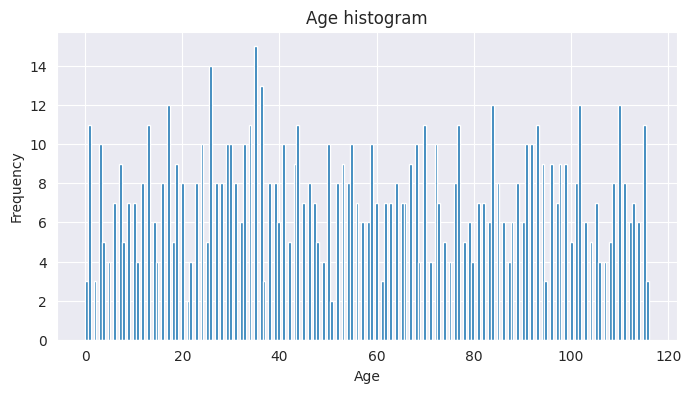

In [209]:
plt.figure(figsize=(8, 4))
plt.hist(user['age'], bins=200)
plt.title('Age histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Here we can see that there is no global pattern in age itself hence we cannot use mean or average value to replace NaN. Therefore, we will replace 
it with random values based on existing ones. 
Random replacement allows us to process the rows with NaN values in 'age' column without affecting correlations with 'age'

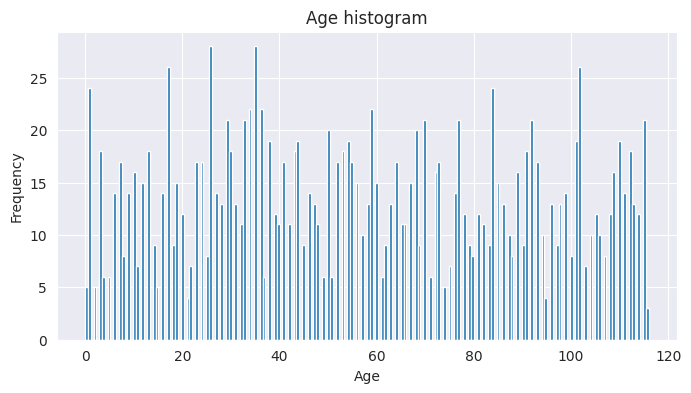

In [210]:
observed_ages = user['age'].dropna()
missing_indices = user['age'].isnull()
num_missing = missing_indices.sum()
random_age_values = np.random.choice(observed_ages, num_missing)
user.loc[missing_indices, 'age'] = random_age_values
plt.figure(figsize=(8, 4))
plt.hist(user['age'], bins=200)
plt.title('Age histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Now we are moving on to 'current_location' NaN values. At first, we shall look at geographical distribution of the existing values.

In [211]:
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy([longitude for longitude in user.dropna(subset=['longitude'])['longitude']], [latitude for latitude in user.dropna(subset=['latitude'])['latitude']]))
m = folium.Map(location=[gdf.geometry.y.mean(), gdf.geometry.x.mean()], zoom_start=2)
for idx, row in gdf.iterrows():
    folium.Marker([row.geometry.y, row.geometry.x]).add_to(m)
m.save("world_map.html")

All these coordinates make no sense for our purposes. They point to absolutely random place on Earth, including oceans and non-inhabitant regions. Unfortunately, we cannot extract user's region from this information. There is no sense to handle NaN values in such chaotic information, therefore, it should be dropped.
(The map can be opened from the current directory in a browser "world_map.html")

In [212]:
user = user.drop(columns=['latitude', 'longitude'])

In [213]:
def freq_nan(dataset, threshold):
    nan_mask = dataset.isna()
    nan_count_per_row = nan_mask.sum(axis=1)
    freq_nan_rows = nan_count_per_row > threshold
    return dataset[freq_nan_rows]
rows_to_delete = freq_nan(user, 2)
rows_to_delete

address registration  user_id                      name residence  sex  \
1397     NaN   2023-10-09      426         Helma Schuchhardt       NaN  NaN   
1661     NaN   2023-04-13     1578              Dustin Perez       NaN  NaN   
2282     NaN   2023-04-08      478          Giacomo Badoglio       NaN  NaN   
1681     NaN   2023-03-07      583             Filip Šťastný       NaN  NaN   
76       NaN   2023-02-14     2134                      林 裕太       NaN  NaN   
...      ...          ...      ...                       ...       ...  ...   
818      NaN   2014-07-02     2028  Sole Ferrazzi-Stradivari       NaN  NaN   
1712     NaN   2014-06-14     1501              Teresa Ellis       NaN  NaN   
2284     NaN   2014-04-22     1801            Jeffrey Garner       NaN  NaN   
1580     NaN   2013-12-19     1383            Květa Kučerová       NaN  NaN   
445      NaN   2013-02-11     1992            Alina Schuster       NaN  NaN   

       age  
1397  19.0  
1661  99.0  
2282  40.0  
1681  72.0  
76    18.0  
...    ...  
818   96.0  
1712  10.0  
2284  36.0  
1580  92.0  
445    3.0  

[83 rows x 7 columns]

We can delete these 20 rows without significantly affecting the overall dataset

In [214]:
user = user.drop(rows_to_delete.index)
user = user.reset_index(drop=True)
user

address registration  user_id  \
0                                                   NaN   2023-12-06     1067   
1                                 兵庫県横浜市瀬谷区台東26丁目13番16号   2023-12-05     1756   
2       68780 Miles Parks Suite 027\nGinastad, KY 94338   2023-12-04      295   
3                       V Hájkách 7\n231 30 Horní Bříza   2023-11-09       50   
4     7875 Andrea Track Apt. 756\nSamuelburgh, GU 91508   2023-11-02     2522   
...                                                 ...          ...      ...   
1498   Lagoa Eduardo da Mota\nUrca\n84390354 Viana / PR   2013-10-01      928   
1499                Čelakovského Sady 26\n122 53 Votice   2013-09-25     1939   
1500  03593 Jennifer Spur Apt. 552\nNew Thomas, IA 3...   2013-08-12     2473   
1501         Vicolo Caterina, 25\n94010, Cacchiamo (EN)   2013-07-11     2392   
1502   68468 Hannah Drive Apt. 662\nLopezport, NY 09163   2013-04-10      438   

                  name                                          residence  \
0      Zbyněk Pospíšil         Červenkova 771\n771 89 Lomnice nad Lužnicí   
1                 青木 晃                                                NaN   
2          Nancy Price      365 Daniel Rapid Apt. 453\nTateberg, MI 85109   
3     Štěpánka Fialová                                                NaN   
4          Julie Smith                                                NaN   
...                ...                                                ...   
1498     Helena Araújo                                                NaN   
1499  Denisa Svobodová                     U Nového Dvora 7\n344 92 Loket   
1500    Erica Williams       54918 Samuel Creek\nNorth Paulbury, ME 86416   
1501   Claudio Leblanc                                                NaN   
1502    Raymond Farmer  21736 Dale Land Suite 360\nNorth Virginia, VI ...   

      sex    age  
0     0.0   87.0  
1     NaN   17.0  
2     1.0   94.0  
3     NaN    3.0  
4     NaN   35.0  
...   ...    ...  
1498  NaN   19.0  
1499  NaN   33.0  
1500  NaN   36.0  
1501  0.0  105.0  
1502  0.0   59.0  

[1503 rows x 7 columns]

Let's do the similar check as at the start of this section

In [215]:
nan_stats(user)

Column:                            Real Value:    NaN
address                            1345           158
registration                       1503           0
user_id                            1503           0
name                               1503           0
residence                          546            957
sex                                778            725
age                                1503           0

Columns with a significant number of NaN values: 

residence
Ratio of NaN to real_values: 1.7527472527472527

sex
Ratio of NaN to real_values: 0.9318766066838047

address
Ratio of NaN to real_values: 0.11747211895910781


We will handle NaN values in 'sex' column with names using language models deriving the sex of a customer from the name. Address and residence will be used to define the user's region

# Product

In [216]:
product

location    product_ean code   store_name
0        America/Chicago  6308407882743   US   Hutchinson
1             Asia/Tokyo  4331962623546   JP     Kamakura
2          Europe/London  4460840744407   GB      Hartley
3          Asia/Shanghai  4075318009546   CN      Yingkou
4       America/New_York  5684895028148   US   Massapequa
...                  ...            ...  ...          ...
14939  Asia/Kuala_Lumpur  1690573891304   MY  Teluk Intan
14940         Asia/Tokyo  2921189921086   JP     Sasayama
14941      Europe/Warsaw  6354194602972   PL        Brzeg
14942       Asia/Kolkata  6744829514365   IN         Adra
14943       Europe/Sofia  8657758529646   BG        Aytos

[14944 rows x 4 columns]

**NaN**

In [217]:
nan_stats(product)

Column:                            Real Value:    NaN
location                           14944          0
product_ean                        14944          0
code                               14925          19
store_name                         14944          0

Columns with a significant number of NaN values: 


We can drop NaN variables without significantly affecting the dataset

In [218]:
product = product.dropna()

**Formatting**

Then we should separate the location to encode this information

In [219]:
regions = []
towns = []
for location in product['location']:
    if location is np.nan:
        regions.append(np.nan)
        towns.append(np.nan)
        continue
    split_location = location.split("/")
    regions.append(split_location[0])
    if split_location[-1] == "Kiev":
        towns.append("Kyiv") # lahidna ukrajinizacia
        continue
    towns.append(split_location[-1])
product['region'] = regions
product['town'] = towns
product = product.drop(columns='location')
product

/tmp/ipykernel_8150/2886790971.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product['region'] = regions
/tmp/ipykernel_8150/2886790971.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product['town'] = towns


product_ean code   store_name   region          town
0      6308407882743   US   Hutchinson  America       Chicago
1      4331962623546   JP     Kamakura     Asia         Tokyo
2      4460840744407   GB      Hartley   Europe        London
3      4075318009546   CN      Yingkou     Asia      Shanghai
4      5684895028148   US   Massapequa  America      New_York
...              ...  ...          ...      ...           ...
14939  1690573891304   MY  Teluk Intan     Asia  Kuala_Lumpur
14940  2921189921086   JP     Sasayama     Asia         Tokyo
14941  6354194602972   PL        Brzeg   Europe        Warsaw
14942  6744829514365   IN         Adra     Asia       Kolkata
14943  8657758529646   BG        Aytos   Europe         Sofia

[14925 rows x 5 columns]

**Duplicates**

Check duplicated values in product_ean

In [220]:
print("Duplicated values in product_ean:" + str(product['product_ean'].count() - product['product_ean'].nunique()))

Duplicated values in product_ean:0


Check whether data about store repeat

In [221]:
product['store_name'].value_counts()

store_name
Schiebroek           30
Colomiers            29
Zaozhuang            28
Hermsdorf            28
Saraj                28
                     ..
Ishim                 7
Shalqar               7
Brierley Hill         7
Odessa                6
Gates-North Gates     3
Name: count, Length: 957, dtype: int64

In [222]:
product['region'].value_counts()

region
Europe       4564
America      4472
Asia         4226
Africa       1309
Australia     171
Indian         83
Pacific        68
Atlantic       32
Name: count, dtype: int64

In [223]:
product['town'].value_counts()

town
New_York    1063
Kolkata     1042
Berlin       747
Chicago      731
Shanghai     652
            ... 
Belem         10
Yerevan       10
Saratov       10
Bamako         9
Aqtobe         7
Name: count, Length: 183, dtype: int64

In [224]:
product['code'].value_counts()

code
US    2576
IN    1042
RU     801
DE     747
CN     674
      ... 
CF      11
XK      11
VN      11
AM      10
ML       9
Name: count, Length: 133, dtype: int64

The data is repeated frequently, therefore, we can encode it with classic numeric encoding

In [225]:
label_encoder = LabelEncoder()
product['store_name'] = label_encoder.fit_transform(product['store_name'])
product['code'] = label_encoder.fit_transform(product['code'])
product['region'] = label_encoder.fit_transform(product['region'])
product['town'] = label_encoder.fit_transform(product['town'])
product

product_ean  code  store_name  region  town
0      6308407882743   124         347       1    37
1      4331962623546    61         394       2   162
2      4460840744407    43         321       5    94
3      4075318009546    25         941       2   151
4      5684895028148   124         518       1   120
...              ...   ...         ...     ...   ...
14939  1690573891304    83         836       2    86
14940  2921189921086    61         746       2   162
14941  6354194602972    96         127       5   175
14942  6744829514365    56           8       2    84
14943  8657758529646    11          57       5   153

[14925 rows x 5 columns]

# Session

In [226]:
session

pct_mouse_click  pct_click    product_ean  session_id  \
0             10.57752    5.46845  6683142269036      701347   
1              9.58662    8.06907  9632403910467     1336164   
2              9.47789    7.92570  4830022699502      197570   
3             11.39956    6.48313  6012378144815     1233211   
4              9.94396    8.65422   808433374916     1410112   
...                ...        ...            ...         ...   
11070         11.08250    6.50044  4628347534789      746795   
11071         13.51066    4.52018  4978171808397     1010997   
11072         10.79758   10.90154  3792936929650     1264423   
11073          8.79427    9.55948  1370957534729      350635   
11074         11.42125   12.85063  7960943540588      532705   

       pct_scroll_move_duration  scroll_move_total_rel_distance  pct_scrandom  \
0                       7.15619                         9.73359      22.64234   
1                       9.96110                        11.05089      45.12756   
2                       9.45969                        11.22442      56.12916   
3                       7.44172                         8.74288      23.14856   
4                       9.72734                         8.69972      42.76892   
...                         ...                             ...           ...   
11070                   7.22336                        11.32851      27.63637   
11071                   6.35497                         9.04493      24.55502   
11072                   8.06686                         9.83549      40.32190   
11073                   8.11641                         7.99808      63.49011   
11074                   6.55142                         8.24959      46.77124   

       mouse_move_total_rel_distance  page_activity_duration screen_height  \
0                            6.69014                10.05935           768   
1                            9.47380                 9.11886           600   
2                            9.08196                 9.58957           800   
3                            7.22458                10.59042          1080   
4                            4.23040                 9.35735           800   
...                              ...                     ...           ...   
11070                        5.90661                10.67330          1080   
11071                        9.86588                 9.51134           768   
11072                        8.37836                 9.55577           600   
11073                        6.56825                 9.10113           600   
11074                        9.06371                10.79539          1024   

       ...  total_load_time        session_start  wild_mouse_duration  \
0      ...          5.04607  2022-10-26 23:34:44             10.47393   
1      ...          5.47921  2020-02-03 12:05:35              9.67811   
2      ...          5.82196  2019-06-08 04:55:43             10.40237   
3      ...          1.64424  2022-01-14 07:11:36             13.01746   
4      ...          3.25284  2020-11-12 10:38:58             10.91638   
...    ...              ...                  ...                  ...   
11070  ...          5.64065  2023-08-06 08:02:43              8.91797   
11071  ...         13.80593  2021-09-19 22:27:19             14.29029   
11072  ...         11.53913  2019-11-05 22:04:19              8.32945   
11073  ...          3.37595  2020-05-14 07:27:06             12.05628   
11074  ...          2.64430  2019-04-10 04:03:34              9.82171   

       browser_name  pct_wild_mouse  pct_scroll_move  ack  pct_doubleclick  \
0           firefox        22.25759         34.48123  0.0         11.45183   
1            chrome        27.80762         54.03556  0.0          5.90110   
2           firefox        45.74291         71.01563  0.0          5.44241   
3            mobile        33.46381         61.27034  0.0         11.91876   
4              edge        64.58192         58.27287  0.0    

**Formatting**

In [227]:
session['browser_name'] = label_encoder.fit_transform(session['browser_name'])

Some values are strings

In [228]:
for column in session.columns:
    if session[column].apply(lambda x: isinstance(x, str)).any():
        print(f"Strings found: {column}")

Strings found: screen_height
Strings found: session_start
Strings found: screen_width


Let's see what's the problem

In [229]:
session[['screen_height', 'screen_width', 'session_start', 'pct_click_product_info']]

screen_height screen_width        session_start  pct_click_product_info
0               768          800  2022-10-26 23:34:44                42.59830
1               600         1024  2020-02-03 12:05:35                66.33836
2               800         1920  2019-06-08 04:55:43                41.81338
3              1080         1280  2022-01-14 07:11:36                73.00499
4               800         1920  2020-11-12 10:38:58                24.31984
...             ...          ...                  ...                     ...
11070          1080         1366  2023-08-06 08:02:43                60.90588
11071           768          800  2021-09-19 22:27:19                70.11449
11072           600          800  2019-11-05 22:04:19                48.44198
11073           600         1920  2020-05-14 07:27:06                37.74382
11074          1024         1366  2019-04-10 04:03:34                49.70325

[11075 rows x 4 columns]

We can see that we have 'lower' and 'higher' screen parameters which can be replaced by some constants. session_start is in timestamp format, it's ok. pct_click_product_info should be converted to numerical format.

In [230]:
session.loc[:, 'pct_click_product_info'] = pd.to_numeric(session['pct_click_product_info'], errors='coerce')
session['screen_height'] = session['screen_height'].replace({'lower': 400, 'higher':2160})
session.loc[:, 'screen_height'] = pd.to_numeric(session['screen_height'], errors='coerce')
session['screen_width'] = session['screen_width'].replace({'lower':400, 'higher':3840})
session.loc[:, 'screen_width'] = pd.to_numeric(session['screen_width'], errors='coerce')
session['session_start'] = pd.to_datetime(session['session_start'], format='%Y-%m-%d %H:%M:%S')

In [231]:
for column in session.columns:
    if session[column].apply(lambda x: isinstance(x, str)).any():
        print(f"Strings found: {column}")
session[['screen_height', 'screen_width', 'session_start', 'pct_click_product_info']]

screen_height screen_width       session_start  pct_click_product_info
0               768          800 2022-10-26 23:34:44                42.59830
1               600         1024 2020-02-03 12:05:35                66.33836
2               800         1920 2019-06-08 04:55:43                41.81338
3              1080         1280 2022-01-14 07:11:36                73.00499
4               800         1920 2020-11-12 10:38:58                24.31984
...             ...          ...                 ...                     ...
11070          1080         1366 2023-08-06 08:02:43                60.90588
11071           768          800 2021-09-19 22:27:19                70.11449
11072           600          800 2019-11-05 22:04:19                48.44198
11073           600         1920 2020-05-14 07:27:06                37.74382
11074          1024         1366 2019-04-10 04:03:34                49.70325

[11075 rows x 4 columns]

**NaN**

In [232]:
nan_stats(session)

Column:                            Real Value:    NaN
pct_mouse_click                    11064          11
pct_click                          11064          11
product_ean                        11075          0
session_id                         11075          0
pct_scroll_move_duration           11064          11
scroll_move_total_rel_distance     11063          12
pct_scrandom                       11064          11
mouse_move_total_rel_distance      11064          11
page_activity_duration             11064          11
screen_height                      11075          0
pct_mouse_move                     11064          11
pct_input                          11064          11
pct_rage_click                     11064          11
session_duration                   11075          0
user_id                            11075          0
total_load_time                    11075          0
session_start                      11075          0
wild_mouse_duration                11064          11

NaN values seem to be in the same rows. Let's check

In [233]:
nan_rows = freq_nan(session, 1)
nan_rows

pct_mouse_click  pct_click    product_ean  session_id  \
5336         11.52720    8.31430  4019766604830      984475   
5568         10.72648    6.00848  6283463702269      207884   

      pct_scroll_move_duration  scroll_move_total_rel_distance  pct_scrandom  \
5336                   6.26503                        12.92277      51.16218   
5568                   4.70822                        11.52044           NaN   

      mouse_move_total_rel_distance  page_activity_duration screen_height  \
5336                        5.47592                10.06080           600   
5568                        5.39051                11.45013          1024   

      ...  total_load_time       session_start  wild_mouse_duration  \
5336  ...          5.09738 2021-05-05 19:50:42             10.37489   
5568  ...          3.03584 2019-01-20 16:49:39             10.77321   

      browser_name  pct_wild_mouse  pct_scroll_move  ack  pct_doubleclick  \
5336             1             NaN         54.40365  0.0          8.08143   
5568             1        64.08967         68.74898  0.0         10.07692   

      screen_width  pct_click_product_info  
5336           400                49.54097  
5568           400                76.38161  

[2 rows x 25 columns]

There is only two rows with multiple NaN values. Let's check how much data we lost in case of deleting all missing values

In [234]:
len(session.index) - len(session.dropna().index)

164

In fact, we can replace this information with median value because of its adequate distribution but it would be better to drop all these NaN values and don't risk to spoil the statistic. The number of missing data is insignificant.

In [235]:
session = session.dropna()

**Outliers**

In [236]:
def outliers_check(data, outlier_threshold, column_to_check=None):
    columns_with_outliers = {}
    columns = []
    if column_to_check is None:
        columns = data.select_dtypes(include=['number'])
    else:
        columns.append(column_to_check)
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - outlier_threshold * IQR
        upper_bound = Q3 + outlier_threshold * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        if not outliers.empty:
            columns_with_outliers[column] = len(outliers)
    columns_with_outliers = sorted(columns_with_outliers.items(), key=lambda item: item[1])
    for column, count in columns_with_outliers:
        plt.figure()
        data.boxplot(column=column)
        plt.title(f"Outliers in {column}: {count / data[column].count()}%")
        plt.show()

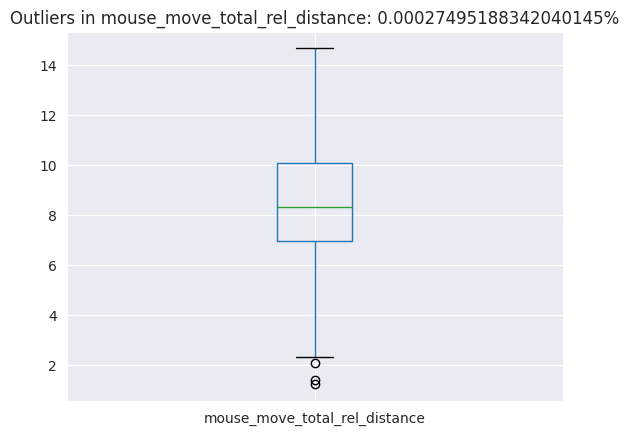

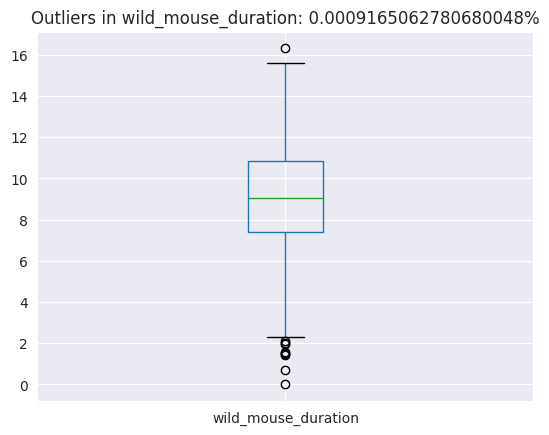

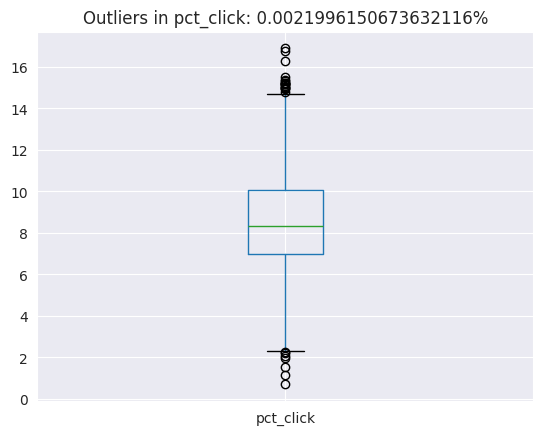

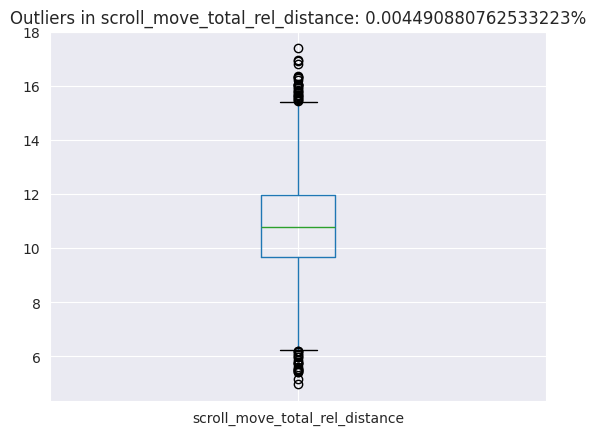

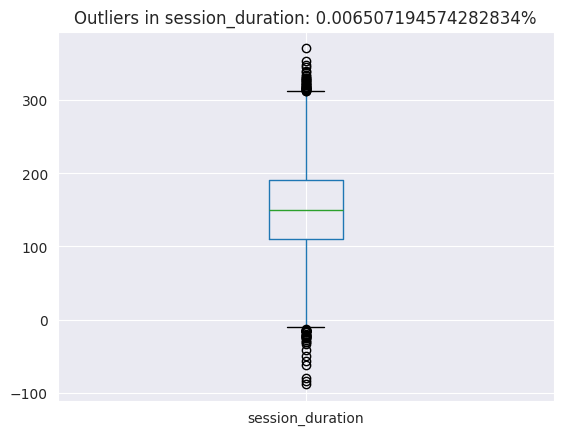

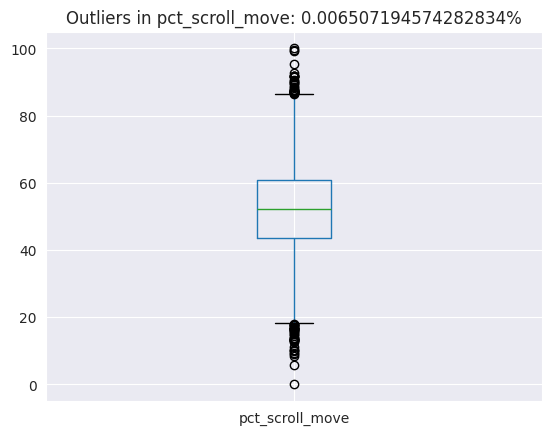

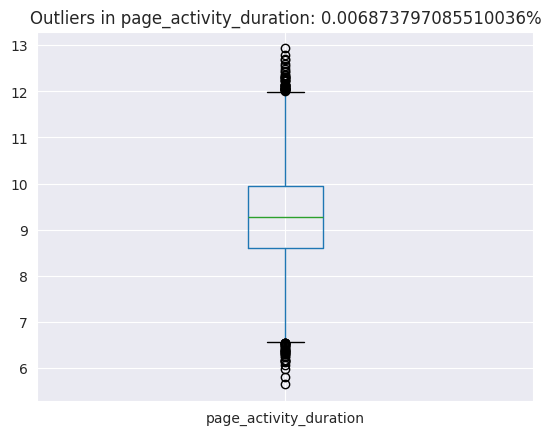

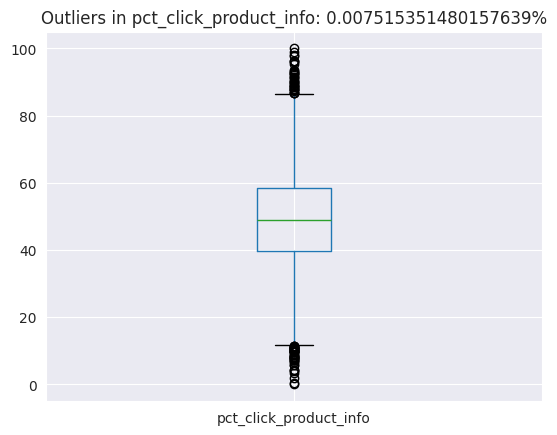

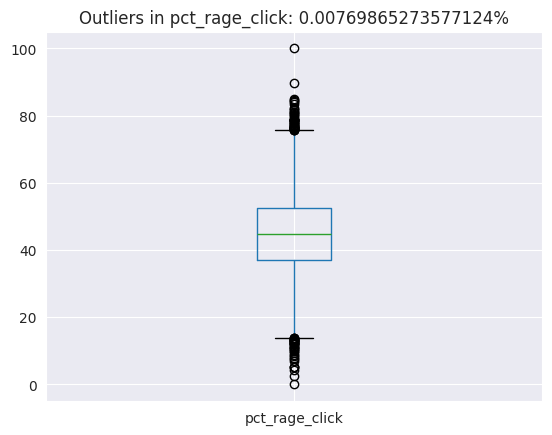

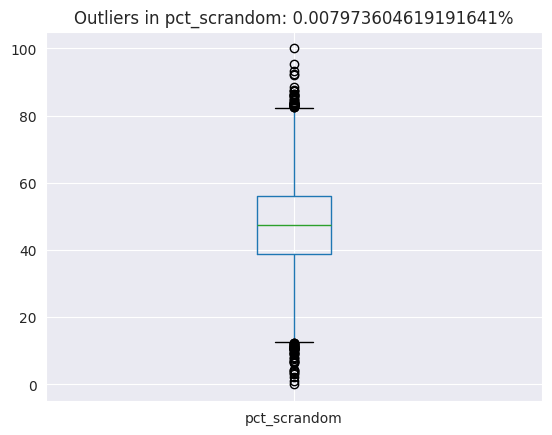

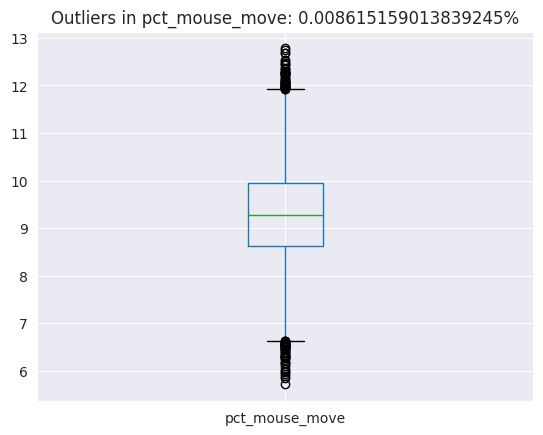

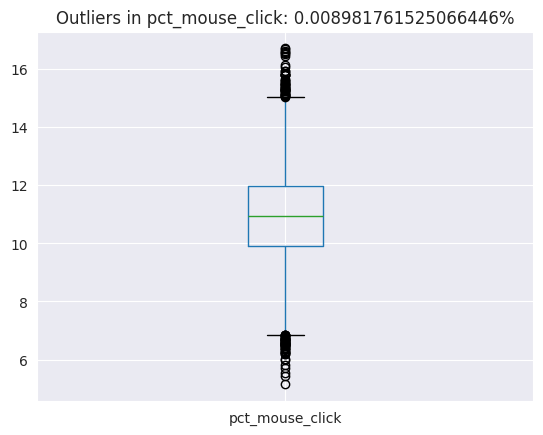

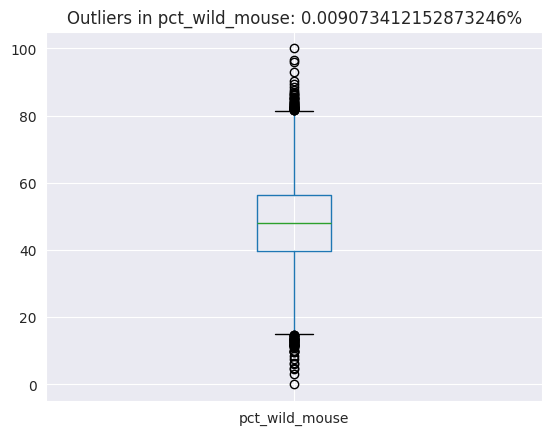

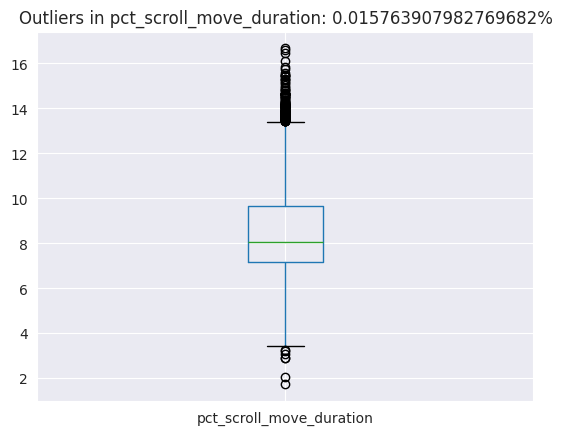

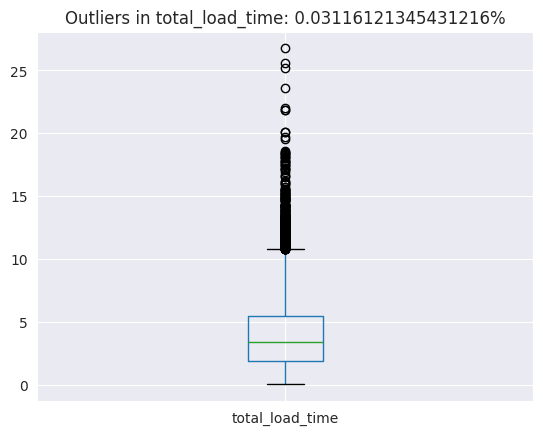

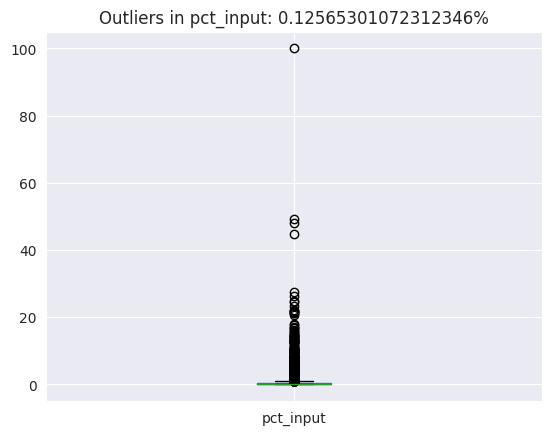

In [237]:
outliers_check(session, 1.5)

Let's move the outliers to the closest border in the dataset for now. We will consider another approach later.

In [238]:
def outliers(data, outlier_threshold, column_to_check=None):
    columns_with_outliers = {}
    columns = []
    if column_to_check is None:
        columns = data.select_dtypes(include=['number'])
    else:
        columns.append(column_to_check)
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - outlier_threshold * IQR
        upper_bound = Q3 + outlier_threshold * IQR
        original_data = data[column].copy()
        data[column] = np.where(data[column] < lower_bound, lower_bound, np.where(data[column] > upper_bound, upper_bound, data[column]))
        
        plt.figure(figsize=(16, 6))
        plt.subplots_adjust(hspace=0.4)
        
        plt.subplot(1, 4, 1)
        plt.title(f"Before: {column} (Histogram)")
        sns.histplot(original_data, kde=True, element="step", fill=False)
        
        plt.subplot(1, 4, 2)
        plt.title(f"After: {column} (Histogram)")
        sns.histplot(data[column], kde=True, element="step", fill=False)

        plt.subplot(1, 4, 3)
        plt.title(f"Before: {column} (KDE)")
        sns.kdeplot(original_data, fill=True)

        plt.subplot(1, 4, 4)
        plt.title(f"After: {column} (KDE)")
        sns.kdeplot(data[column], fill=True)
        
        plt.show()
        
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        if not outliers.empty:
            columns_with_outliers[column] = len(outliers)
    columns_with_outliers = sorted(columns_with_outliers.items(), key=lambda item: item[1])
    for column, count in columns_with_outliers:
        print(f"Outliers in {column}: {count / data[column].count()}%")

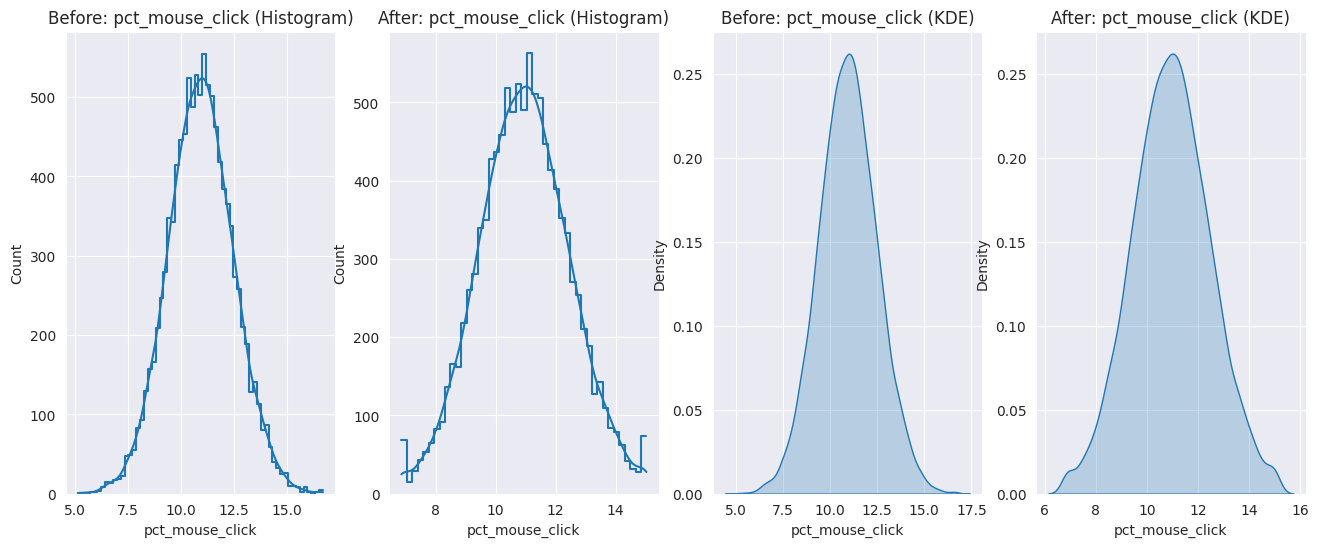

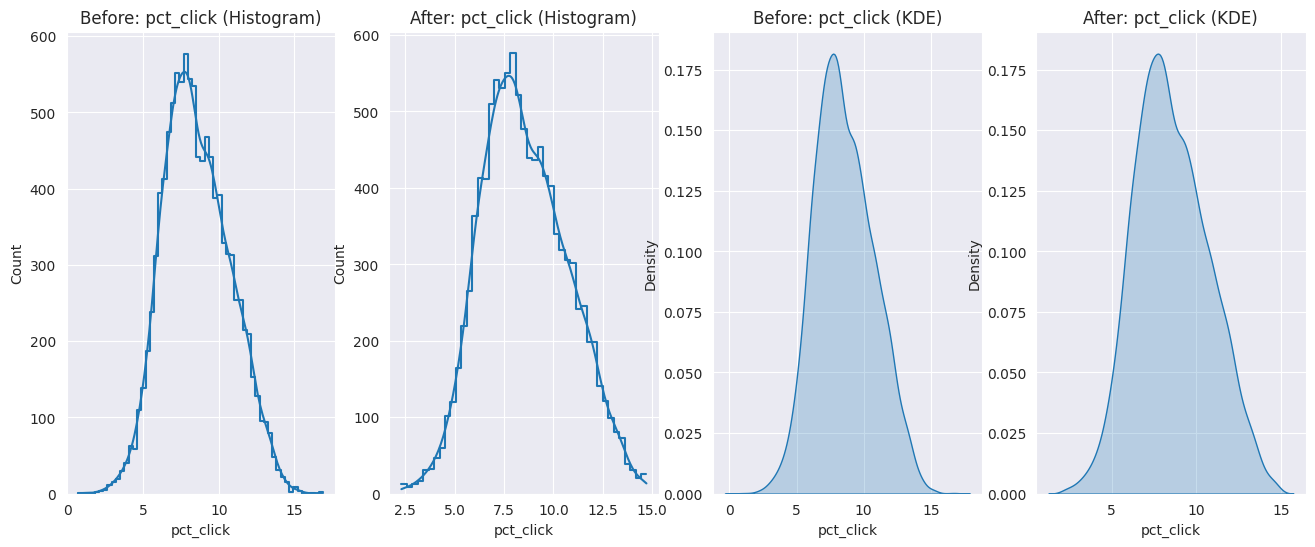

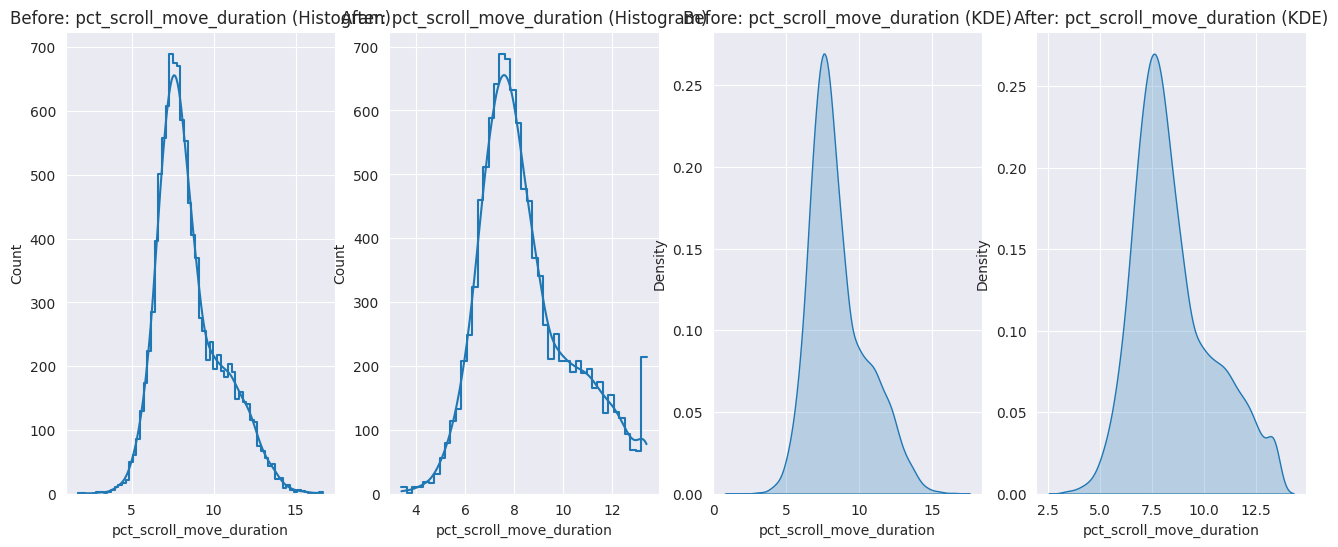

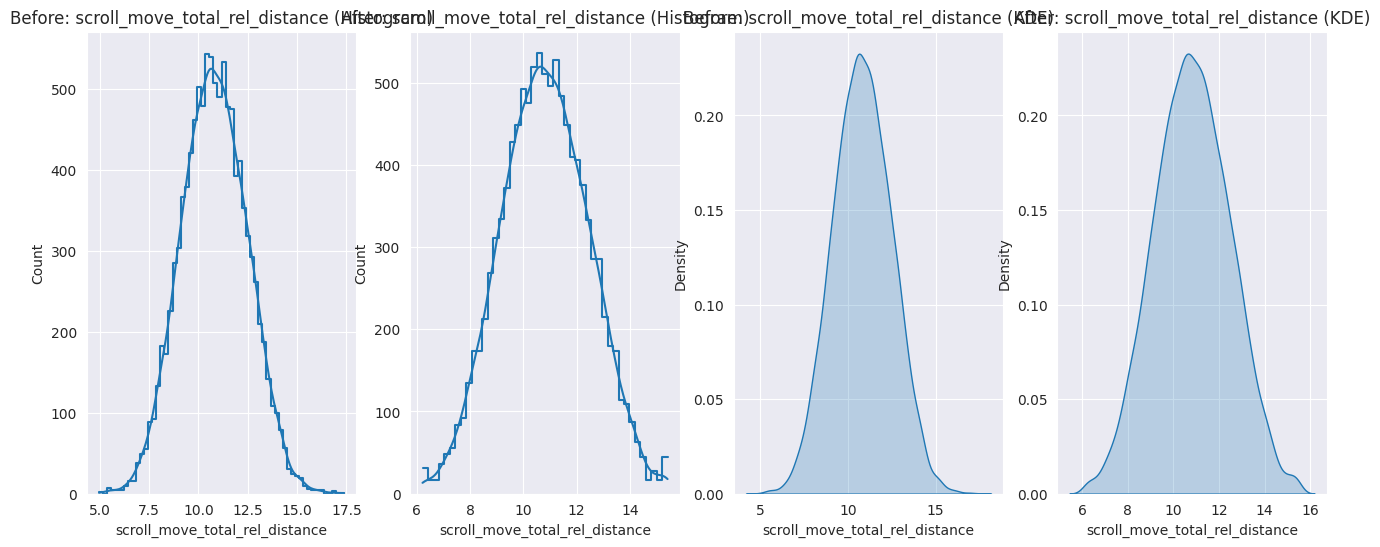

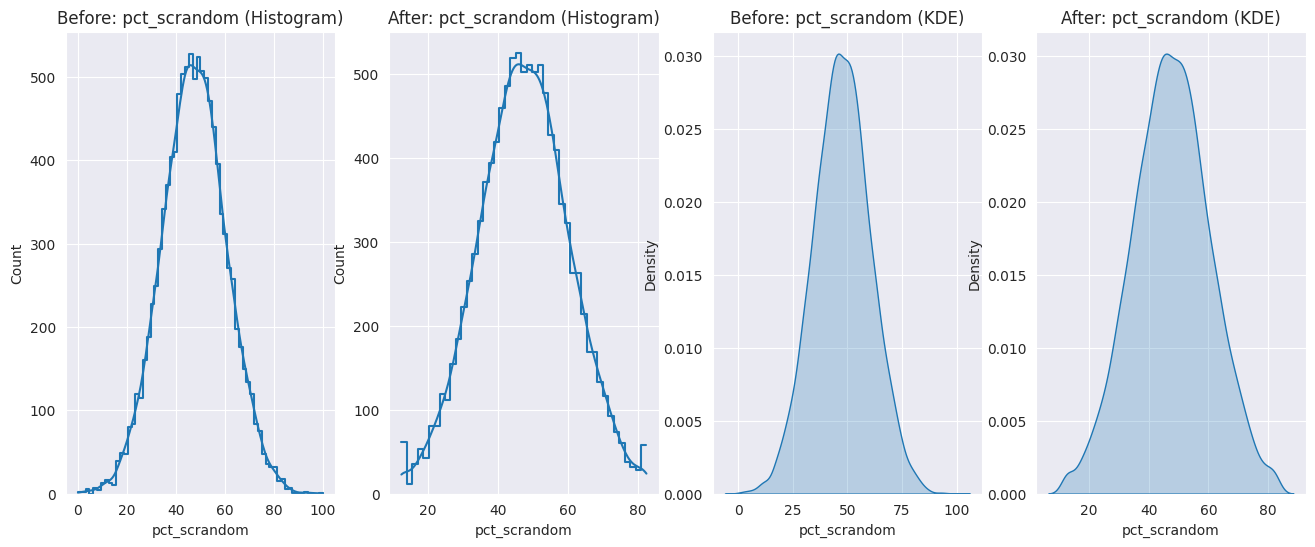

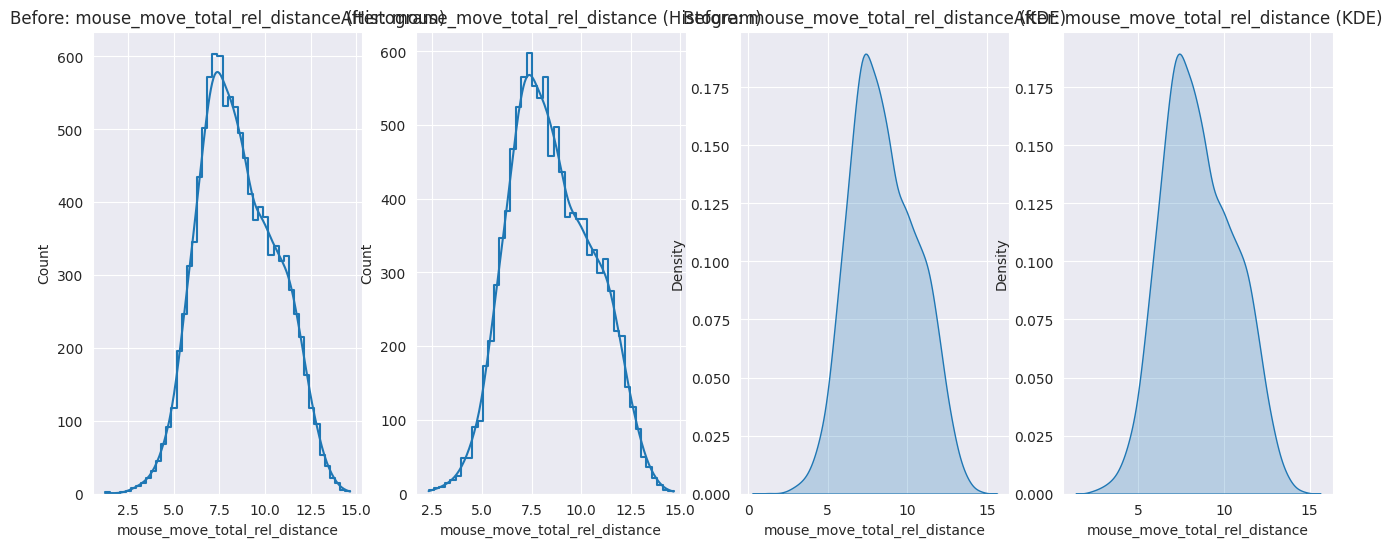

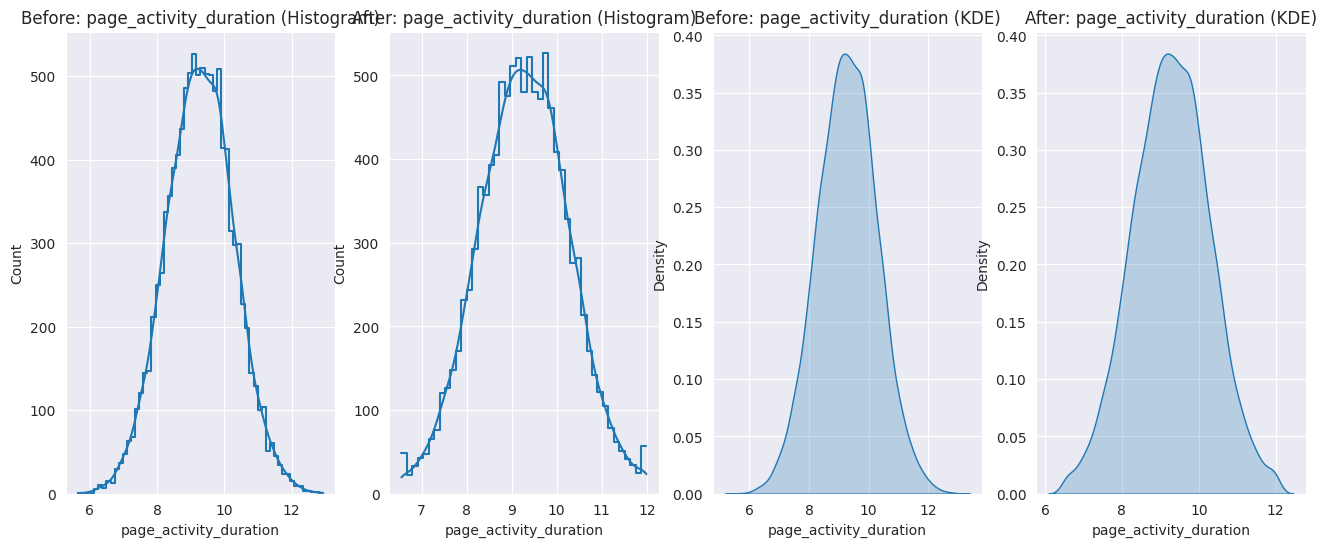

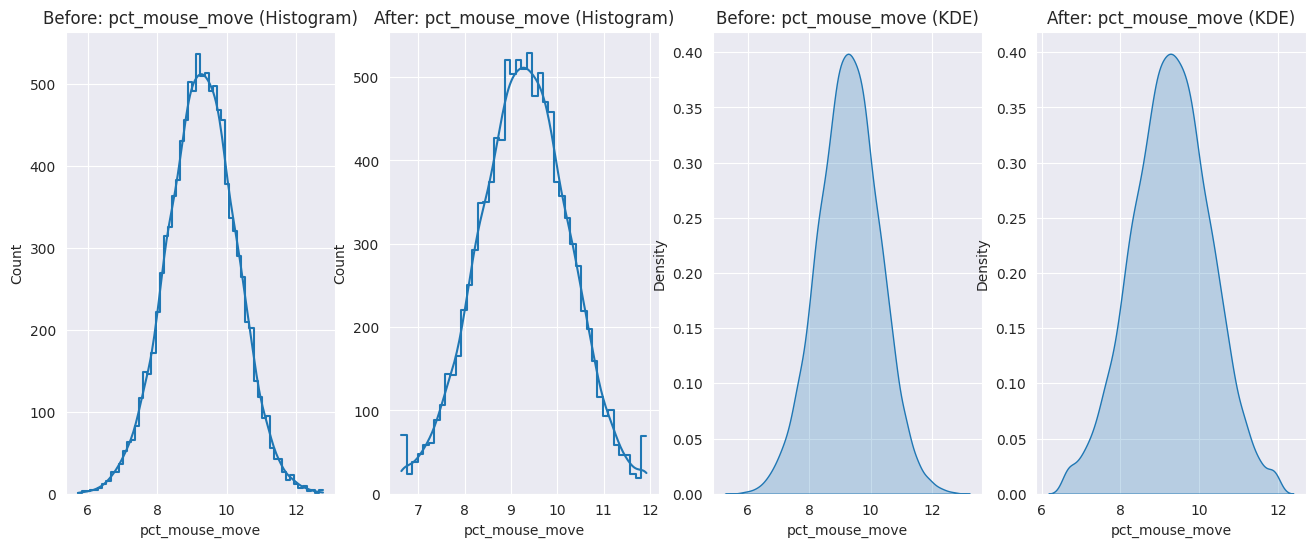

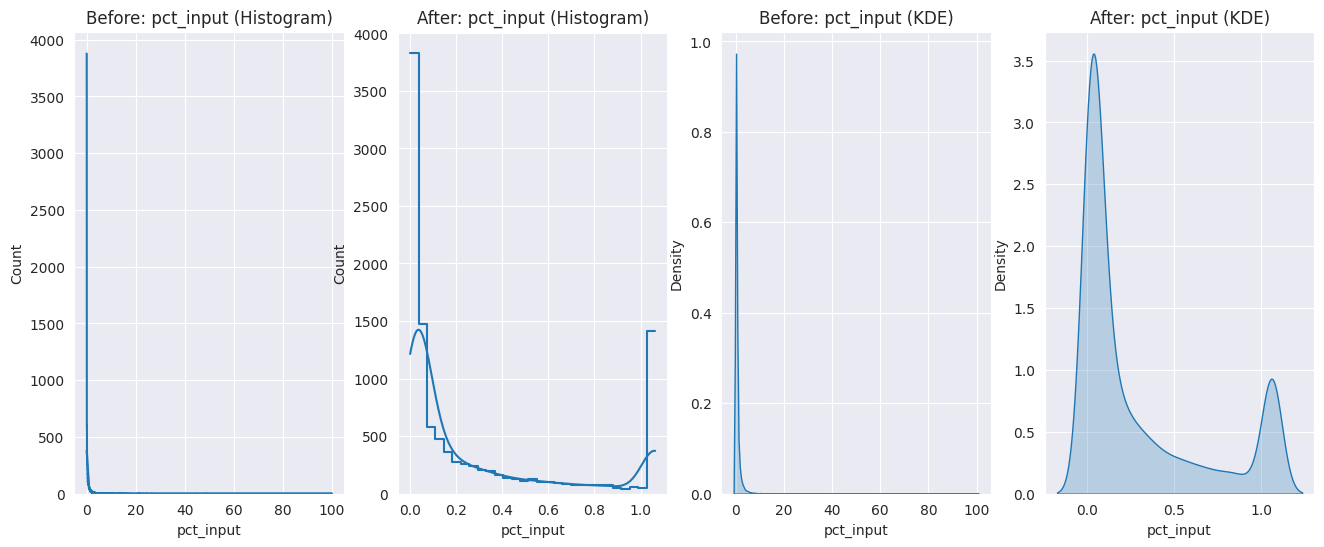

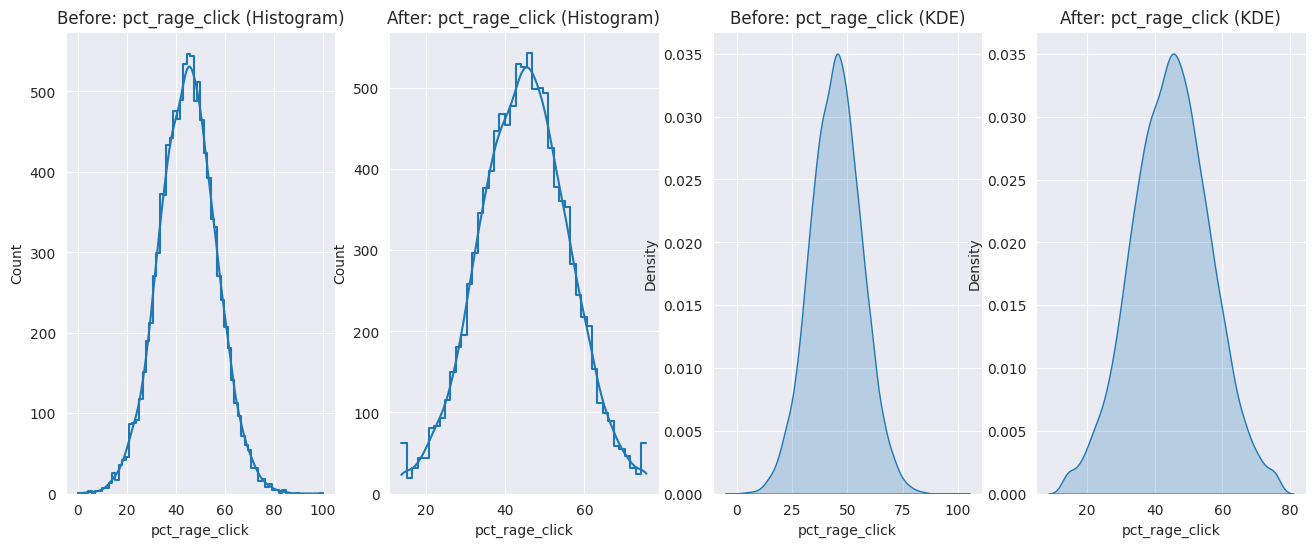

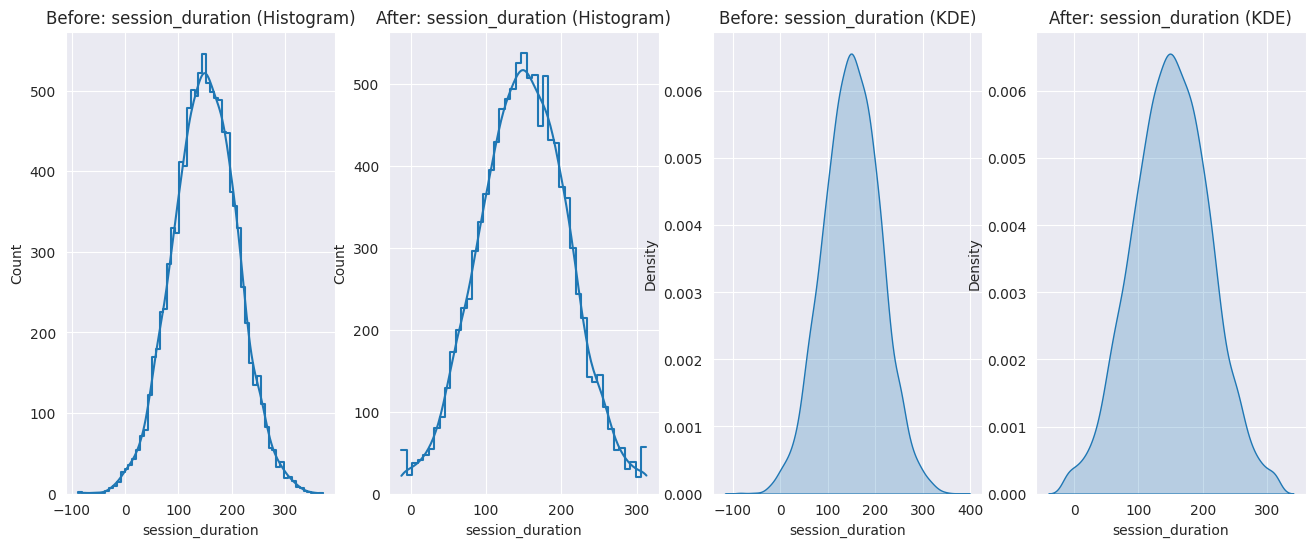

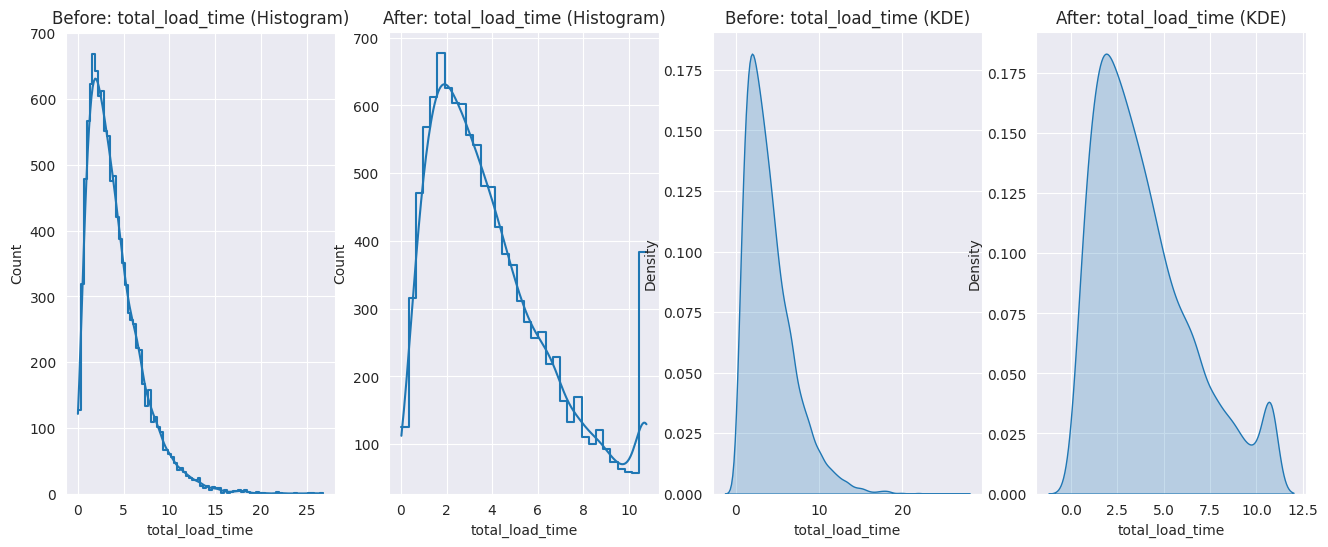

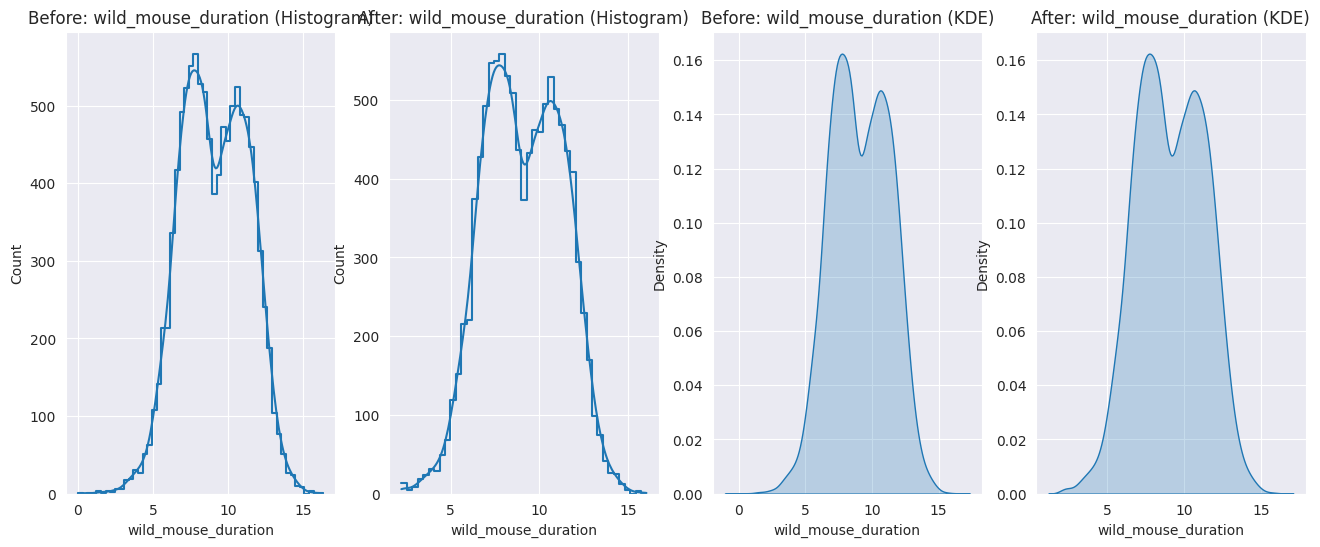

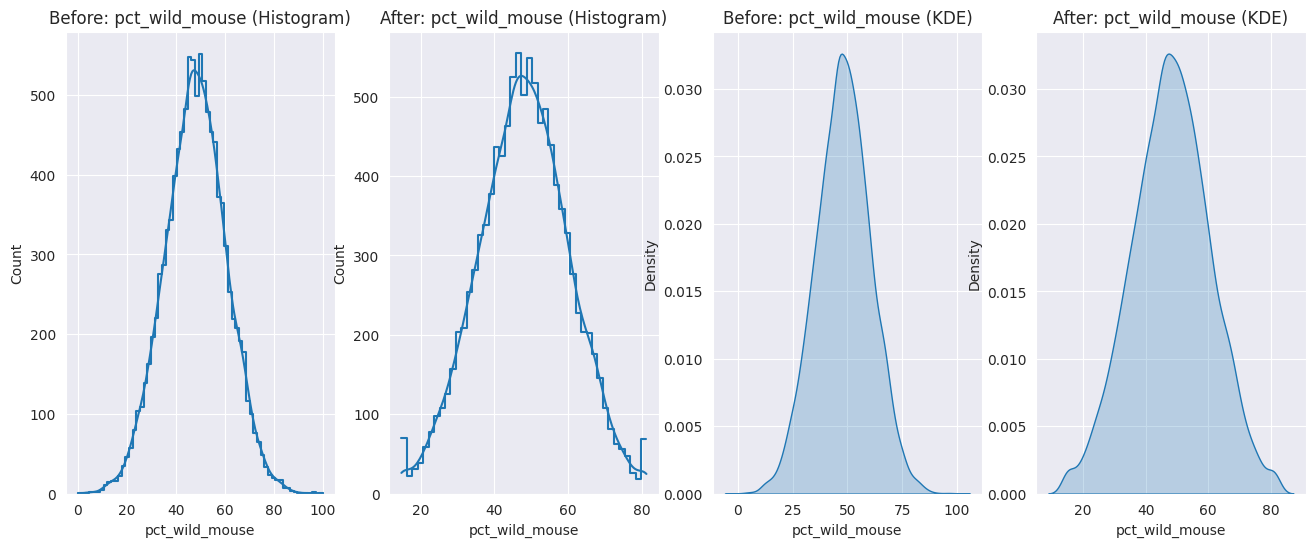

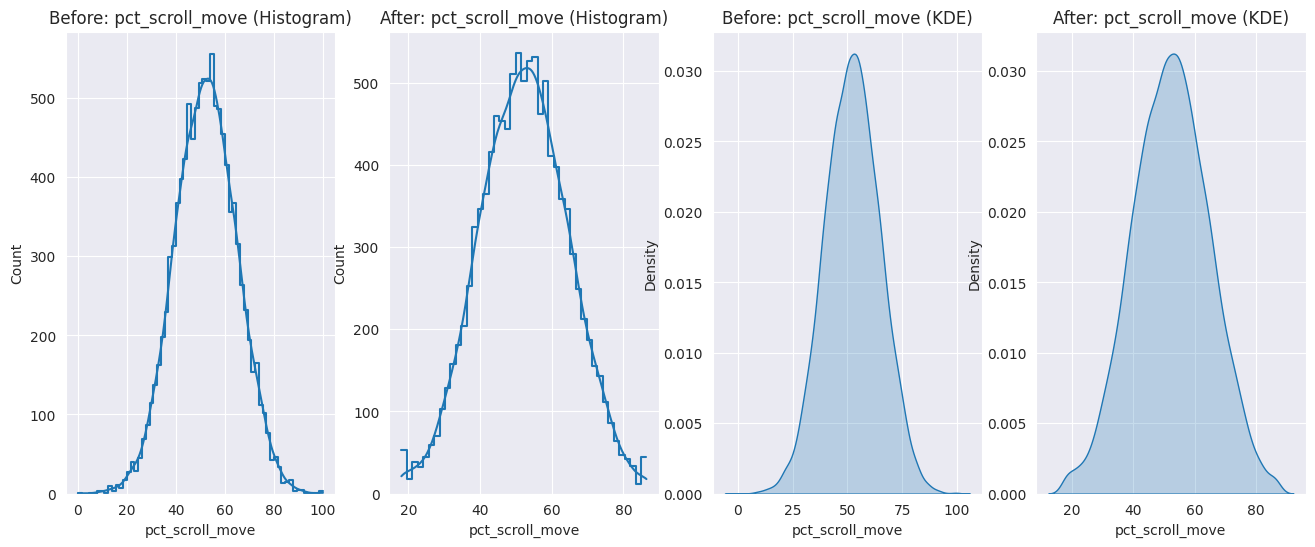

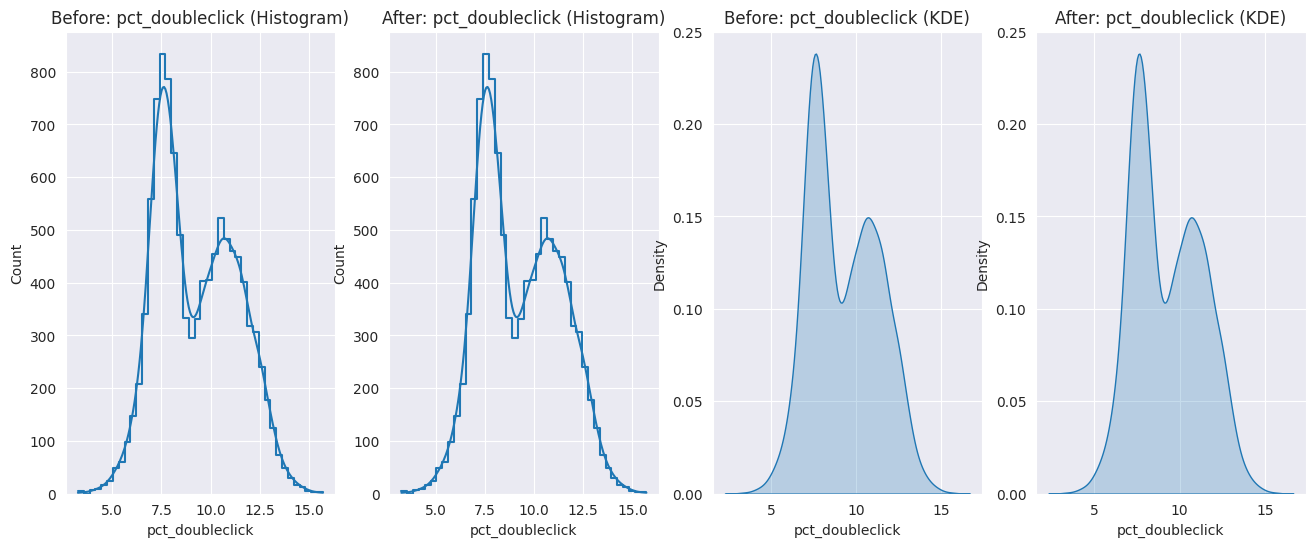

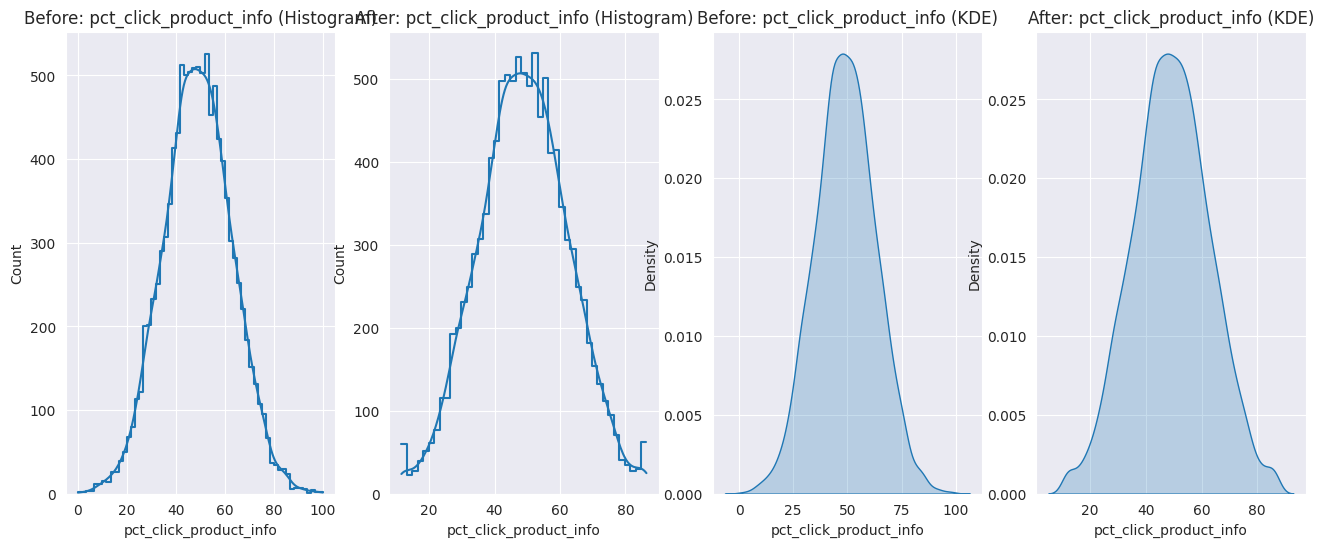

In [239]:
outliers(session.drop(columns=['user_id', 'product_ean', 'session_id', 'ack', 'browser_name', 'screen_width', 'screen_height']), 1.5)

In [240]:
def adjust_outliers_inplace(data, outlier_threshold, columns_to_adjust):
    for column in columns_to_adjust:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - outlier_threshold * IQR
        upper_bound = Q3 + outlier_threshold * IQR
        data.loc[:, column] = np.where(data[column] < lower_bound, lower_bound, np.where(data[column] > upper_bound, upper_bound, data[column]))

In [241]:
adjust_outliers_inplace(session, 1.5, session.drop(columns=['user_id', 'product_ean', 'session_id', 'ack', 'browser_name']).columns)
session

pct_mouse_click  pct_click    product_ean  session_id  \
0             10.57752    5.46845  6683142269036      701347   
1              9.58662    8.06907  9632403910467     1336164   
2              9.47789    7.92570  4830022699502      197570   
3             11.39956    6.48313  6012378144815     1233211   
4              9.94396    8.65422   808433374916     1410112   
...                ...        ...            ...         ...   
11070         11.08250    6.50044  4628347534789      746795   
11071         13.51066    4.52018  4978171808397     1010997   
11072         10.79758   10.90154  3792936929650     1264423   
11073          8.79427    9.55948  1370957534729      350635   
11074         11.42125   12.85063  7960943540588      532705   

       pct_scroll_move_duration  scroll_move_total_rel_distance  pct_scrandom  \
0                       7.15619                         9.73359      22.64234   
1                       9.96110                        11.05089      45.12756   
2                       9.45969                        11.22442      56.12916   
3                       7.44172                         8.74288      23.14856   
4                       9.72734                         8.69972      42.76892   
...                         ...                             ...           ...   
11070                   7.22336                        11.32851      27.63637   
11071                   6.35497                         9.04493      24.55502   
11072                   8.06686                         9.83549      40.32190   
11073                   8.11641                         7.99808      63.49011   
11074                   6.55142                         8.24959      46.77124   

       mouse_move_total_rel_distance  page_activity_duration screen_height  \
0                            6.69014                10.05935           768   
1                            9.47380                 9.11886           600   
2                            9.08196                 9.58957           800   
3                            7.22458                10.59042          1080   
4                            4.23040                 9.35735           800   
...                              ...                     ...           ...   
11070                        5.90661                10.67330          1080   
11071                        9.86588                 9.51134           768   
11072                        8.37836                 9.55577           600   
11073                        6.56825                 9.10113           600   
11074                        9.06371                10.79539          1024   

       ...  total_load_time        session_start  wild_mouse_duration  \
0      ...         5.046070  1666827284000000000             10.47393   
1      ...         5.479210  1580731535000000000              9.67811   
2      ...         5.821960  1559969743000000000             10.40237   
3      ...         1.644240  1642144296000000000             13.01746   
4      ...         3.252840  1605177538000000000             10.91638   
...    ...              ...                  ...                  ...   
11070  ...         5.640650  1691308963000000000              8.91797   
11071  ...        10.765348  1632090439000000000             14.29029   
11072  ...        10.765348  1572991459000000000              8.32945   
11073  ...         3.375950  1589441226000000000             12.05628   
11074  ...         2.644300  1554869014000000000              9.82171   

       browser_name  pct_wild_mouse  pct_scroll_move  ack  pct_doubleclick  \
0                 2        22.25759         34.48123  0.0         11.45183   
1                 0        27.80762         54.03556  0.0          5.90110   
2                 2        45.74291         71.01563  0.0          5.44241   
3                 3        33.46381         61.27034  0.0         11.91876   
4                 1        64.58192         58.27287  0.0    

# Merge the datasets

In [242]:
common_columns_user_session = list(user.columns.intersection(session.columns))
common_columns_user_session

['user_id']

In [243]:
common_columns_session_product = list(session.columns.intersection(product.columns))
common_columns_session_product

['product_ean']

In [244]:
df = pd.merge(user, session, left_on='user_id', right_on='user_id', how='inner')
df

address registration  user_id  \
0                                                   NaN   2023-12-06     1067   
1                                                   NaN   2023-12-06     1067   
2                                 兵庫県横浜市瀬谷区台東26丁目13番16号   2023-12-05     1756   
3                                 兵庫県横浜市瀬谷区台東26丁目13番16号   2023-12-05     1756   
4                                 兵庫県横浜市瀬谷区台東26丁目13番16号   2023-12-05     1756   
...                                                 ...          ...      ...   
6436  03593 Jennifer Spur Apt. 552\nNew Thomas, IA 3...   2013-08-12     2473   
6437         Vicolo Caterina, 25\n94010, Cacchiamo (EN)   2013-07-11     2392   
6438         Vicolo Caterina, 25\n94010, Cacchiamo (EN)   2013-07-11     2392   
6439   68468 Hannah Drive Apt. 662\nLopezport, NY 09163   2013-04-10      438   
6440   68468 Hannah Drive Apt. 662\nLopezport, NY 09163   2013-04-10      438   

                 name                                          residence  sex  \
0     Zbyněk Pospíšil         Červenkova 771\n771 89 Lomnice nad Lužnicí  0.0   
1     Zbyněk Pospíšil         Červenkova 771\n771 89 Lomnice nad Lužnicí  0.0   
2                青木 晃                                                NaN  NaN   
3                青木 晃                                                NaN  NaN   
4                青木 晃                                                NaN  NaN   
...               ...                                                ...  ...   
6436   Erica Williams       54918 Samuel Creek\nNorth Paulbury, ME 86416  NaN   
6437  Claudio Leblanc                                                NaN  0.0   
6438  Claudio Leblanc                                                NaN  0.0   
6439   Raymond Farmer  21736 Dale Land Suite 360\nNorth Virginia, VI ...  0.0   
6440   Raymond Farmer  21736 Dale Land Suite 360\nNorth Virginia, VI ...  0.0   

        age  pct_mouse_click  pct_click    product_ean  ...  total_load_time  \
0      87.0         8.837170    8.70617   452163328932  ...          7.16276   
1      87.0        10.380170    7.57475   216901971565  ...          0.38031   
2      17.0        10.548680    8.75497  6145022323448  ...          2.54159   
3      17.0        15.033102    9.19379  6986884681297  ...          2.68078   
4      17.0         8.101560    8.86353  2430233747768  ...          0.63736   
...     ...              ...        ...            ...  ...              ...   
6436   36.0        12.882490    5.90783  1714427092577  ...          2.67027   
6437  105.0         9.675440    8.91077  6062913026977  ...          3.42423   
6438  105.0         8.596500   10.69874   605726385167  ...          1.50890   
6439   59.0        10.007110   11.95965  2832118411090  ...          3.64559   
6440   59.0        11.713440   10.28504  1916519433392  ...          2.59300   

            session_start  wild_mouse_duration  browser_name  pct_wild_mouse  \
0     1601980781000000000              9.27800             1        58.02296   
1     1674251928000000000             10.90058             1        44.06680   
2     1618955713000000000             11.18768             1        62.71858   
3     1649226572000000000             10.69755             1        67.90705   
4     1539797450000000000              9.72691             1        60.19359   
...                   ...                  ...           ...             ...   
6436  1677520126000000000              7.57398             2        61.40832   
6437  1555371941000000000             11.68520             3        43.63635   
6438  1652472354000000000              6.57223             3        58.07496   
6439  1677800469000000000              6.52653             0        33.79239   
6440  1549641725000000000              4.50419             0        75.94605   

      pct_scroll_move  ack  pct_doubleclick  screen_width  \
0            30.00982  1.0          8.21492           400   
1            56.64681  0.0         10.24164          1280 

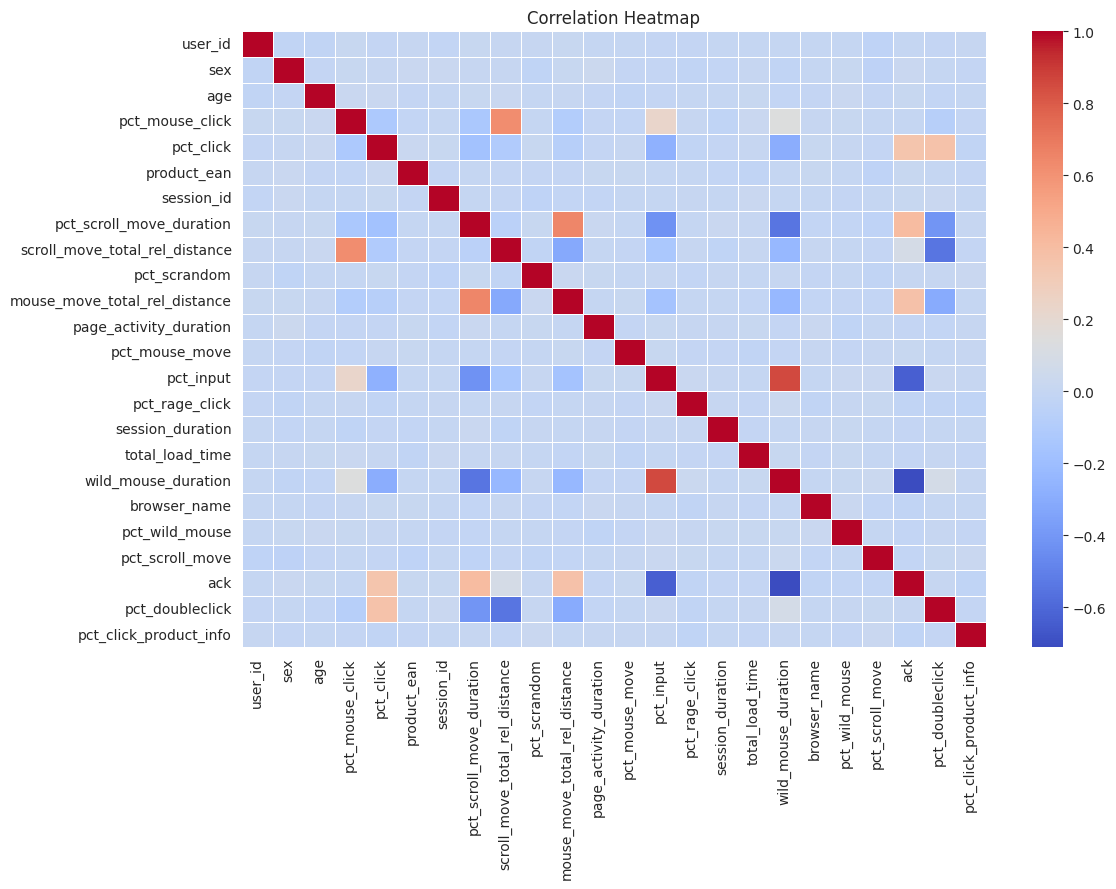

In [245]:
numerical_columns = df.select_dtypes(include=['number'])
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Hypothesis #1

**Null Hypothesis (H0): There is no statistically significant difference in the mean mouse movement duration(wild_mouse_duration) between users who purchase a product (ack = 1) and users who do not purchase a product (ack=0).**

**Alternative Hypothesis (H1): There is a statistically significant difference in the mean mouse movement duration(wild_mouse_duration) between users who purchase a product (ack=1) and users who do not purchase a product (ack=0).**

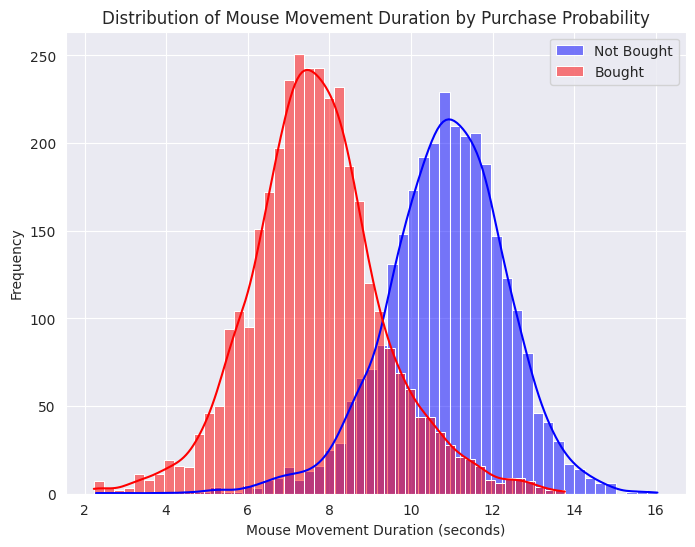

In [246]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['ack'] == 0]['wild_mouse_duration'], kde=True, label='Not Bought', color='blue')
sns.histplot(df[df['ack'] == 1]['wild_mouse_duration'], kde=True, label='Bought', color='red')
plt.xlabel('Mouse Movement Duration (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Mouse Movement Duration by Purchase Probability')
plt.show()

Now we will check the normality of the data to choose the test

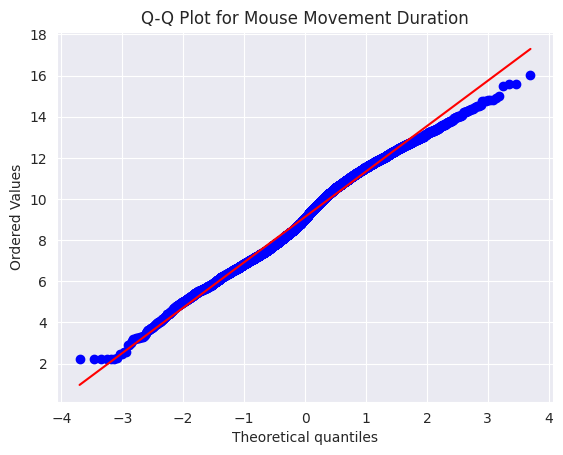

In [247]:
data = df['wild_mouse_duration']
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot for Mouse Movement Duration')
plt.show()

In [248]:
kstest_result = stats.kstest(data, 'norm')
ks_statistic = kstest_result.statistic
p_value = kstest_result.pvalue
print(f"Kolmogorov-Smirnov Statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4e}")
alpha = 0.05  
if p_value < alpha:
    print("The data significantly deviates from a normal distribution.")
else:
    print("There is no significant evidence of departure from a normal distribution.")

Kolmogorov-Smirnov Statistic: 0.9969
P-value: 0.0000e+00
The data significantly deviates from a normal distribution.


In [249]:
w_stat, p_value = stats.shapiro(data)
if p_value < alpha:
    print("The data significantly deviates from a normal distribution.")
else:
    print("There is no significant evidence of departure from a normal distribution.")

The data significantly deviates from a normal distribution.


/home/obile/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [250]:
k2_stat, p_value = stats.normaltest(data)
if p_value < alpha:
    print("The data significantly deviates from a normal distribution.")
else:
    print("There is no significant evidence of departure from a normal distribution.")

The data significantly deviates from a normal distribution.


Somehow, the QQ test shows that the distribution of wild_mouse_duration is close to the diagonal but the statistical tests we used state that the distribution is far from normality. We will trust the mathematics.
Let's use the Mann-Whitney U test to check our hypothesis

In [251]:
group_not_bought = df[df['ack'] == 0]['wild_mouse_duration']
group_bought = df[df['ack'] == 1]['wild_mouse_duration']
statistic, p_value = stats.mannwhitneyu(group_not_bought, group_bought, alternative='two-sided')
print(f"Mann-Whitney U Statistic: {statistic:.2f}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in mouse movement duration between groups.")
else:
    print("There is no significant difference in mouse movement duration between groups.")

Mann-Whitney U Statistic: 9496608.00
P-value: 0.0
There is a significant difference in mouse movement duration between groups.


The Mann-Whitney test indicates that our (H0) hypothesis is rejected. The p_value result confirms that the correlation showed above is unlikely to be a coincidence, therefore the (H1) hypothesis is likely to be confirmed.

# Hypothesis #2

**Null Hypothesis (H0): The mean number of clicks on the webpage (pct_click) is the same for users who bought something (ack=1) and users who didn't (ack=0). In other words, there is no difference in the average number of clicks between these two groups.**

**Alternative Hypothesis (H1): The mean number of clicks on the webpage (pct_click) is greater for users who bought something (ack=1) than for users who didn't (ack=0). In other words, there is a statistically significant difference, and the average number of clicks is higher among those who made a purchase.**

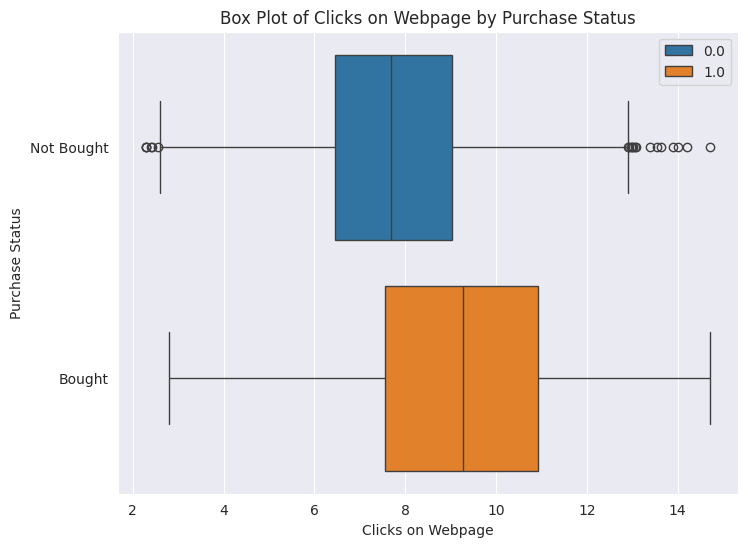

In [252]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='pct_click', y='ack', data=df, hue='ack', dodge=False, orient='horizontal')
plt.xlabel('Clicks on Webpage')
plt.ylabel('Purchase Status')
plt.yticks([0, 1], ['Not Bought', 'Bought'])
plt.title('Box Plot of Clicks on Webpage by Purchase Status')
plt.legend(title=None)
plt.show()

Now we are moving on to normality tests

In [253]:
buyers_clicks = df[df['ack'] == 1]['pct_click']
non_buyers_clicks = df[df['ack'] == 0]['pct_click']
stat_buyers, p_buyers = stats.shapiro(buyers_clicks)
stat_non_buyers, p_non_buyers = stats.shapiro(non_buyers_clicks)
print("Shapiro-Wilk test for buyers' clicks:", p_buyers)
print("Shapiro-Wilk test for non-buyers' clicks:", p_non_buyers)

Shapiro-Wilk test for buyers' clicks: 5.487839390273634e-14
Shapiro-Wilk test for non-buyers' clicks: 0.002688435837626457


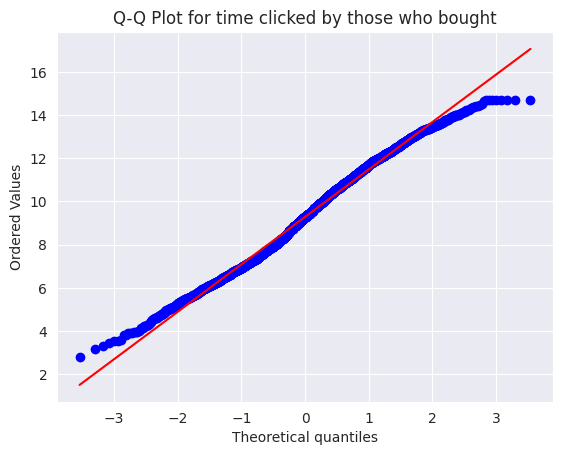

In [254]:
stats.probplot(buyers_clicks, dist="norm", plot=plt)
plt.title('Q-Q Plot for time clicked by those who bought')
plt.show()

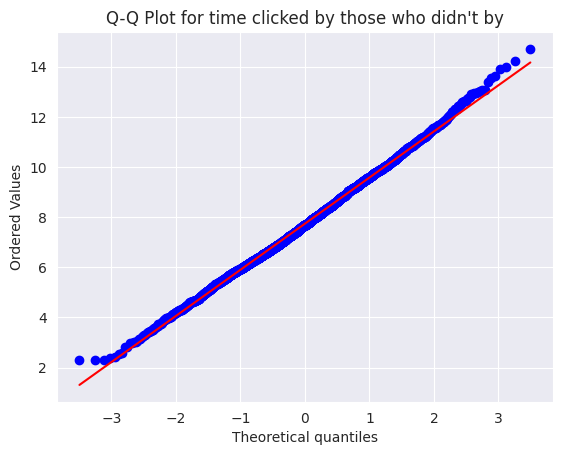

In [255]:
stats.probplot(non_buyers_clicks, dist="norm", plot=plt)
plt.title("Q-Q Plot for time clicked by those who didn't by")
plt.show()

The second graph seems closer to normal distribution than the first one, but we need them both to be so. However, even the second one is not close enough (p_value is less than 0.05)
However, let's perform some statistical tests

In [256]:
data = df['pct_click']
kstest_result = stats.kstest(data, 'norm')
ks_statistic = kstest_result.statistic
p_value = kstest_result.pvalue
print(f"Kolmogorov-Smirnov Statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4e}")
alpha = 0.05  
if p_value < alpha:
    print("The data significantly deviates from a normal distribution.")
else:
    print("There is no significant evidence of departure from a normal distribution.")

Kolmogorov-Smirnov Statistic: 0.9970
P-value: 0.0000e+00
The data significantly deviates from a normal distribution.


In [257]:
w_stat, p_value = stats.shapiro(data)
if p_value < alpha:
    print("The data significantly deviates from a normal distribution.")
else:
    print("There is no significant evidence of departure from a normal distribution.")

The data significantly deviates from a normal distribution.


/home/obile/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [258]:
k2_stat, p_value = stats.normaltest(data)
if p_value < alpha:
    print("The data significantly deviates from a normal distribution.")
else:
    print("There is no significant evidence of departure from a normal distribution.")

The data significantly deviates from a normal distribution.


The data appears not to be in a normal distribution, so we shall use the Mann-Whitney U test again

In [259]:
group_not_bought = df[df['ack'] == 0]['pct_click']
group_bought = df[df['ack'] == 1]['pct_click']
statistic, p_value = stats.mannwhitneyu(group_not_bought, group_bought, alternative='two-sided')
print(f"Mann-Whitney U Statistic: {statistic:.2f}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in clicks between groups.")
else:
    print("There is no significant difference in clicks between groups.")

Mann-Whitney U Statistic: 3100941.50
P-value: 3.2422871326145005e-166
There is a significant difference in clicks between groups.


The Mann-Whitney U test rejects the (H0) hypothesis. Therefore, the difference in amount of clicks on the webpage among those who bought and those who didn't is significant

# Q&A

**Does the data have a suitable format for further processing? If not, what problems do they have?**

The data was cleared and should be suitable for further processing. However, outliers in session dataset can be handled with another approach to improve the quality of result data. 'sex' and 'region' information about customers should be extracted from other text data in the future. This data does not directly influence our hypotheses but can improve the overall quality of the dataset or appear to be another predictor.

**Are there missing values in the data? How do you plan to solve this problem?**

There are still missing values 'sex' and 'region' columns. We will try to extract this data from names and addresses respectively. Other NaN values were replaced using techniques described above. They should be reviewed in the next phase and perhaps a different approach will be chosen.

**Do some attributes take on inconsistent or significantly deviated values?**

Some columns has a remarkable quantity of outliers. They were handled using capping technique. However, this approach does not seem the best in this case so we will consider another options later.

**How do you plan/solve these identified issues?**

For extracting 'sex' we are going to use language models to guess the sex by the name of a person. Addresses and residences will be used to extract the region of customer's location using some online maps API or other geo-services. We are going to use more advanced AI technologies to handle outliers and NaN values in 'age' with less effect on the distribution.